IMPORTING FILE

In [2]:
import pandas as pd
df = pd.read_csv('/content/Global finance data.csv')
print(df.head())
print("\nAvailable Columns:\n", df.columns.tolist())

          Country        Date         Stock_Index  Index_Value  \
0   United States  2024-08-15             S&P_500       5437.2   
1           China  2024-08-15  Shanghai_Composite       2891.6   
2           Japan  2024-08-15          Nikkei_225      36789.1   
3         Germany  2024-08-15                 DAX      18234.5   
4  United Kingdom  2024-08-15            FTSE_100       8156.3   

   Daily_Change_Percent  Market_Cap_Trillion_USD  GDP_Growth_Rate_Percent  \
0                  0.34                     51.2                      2.8   
1                 -0.82                     12.4                      5.2   
2                  1.24                      6.8                      0.9   
3                  0.67                      2.9                      0.3   
4                 -0.15                      3.1                      1.1   

   Inflation_Rate_Percent  Interest_Rate_Percent  Unemployment_Rate_Percent  \
0                     2.9                   5.50             

DIVIDING THE COUNTRIES INTO TWO CATEGORIES DEVLOPED AND DEVLOPING

In [4]:
developed_list = [
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Japan', 'Australia', 'South Korea', 'Italy', 'Spain',
    'Netherlands', 'Sweden', 'Switzerland', 'Norway', 'Denmark',
    'Belgium', 'Austria', 'Finland', 'Ireland', 'New Zealand',
    'Singapore', 'Luxembourg', 'Iceland', 'Portugal', 'Greece'
]

# ✅ Create a new 'Stage' column
df['Stage'] = df['Country'].apply(
    lambda x: 'Developed' if x in developed_list else 'Developing'
)

# ✅ Check the first few rows
print(df[['Country', 'Stage']].head())

          Country       Stage
0   United States   Developed
1           China  Developing
2           Japan   Developed
3         Germany   Developed
4  United Kingdom   Developed


COUNTING THE NUMBER OF COUNTRIES IN EACH CATEGORY

In [5]:
developed = df[df['Stage'] == 'Developed']
developing = df[df['Stage'] == 'Developing']

print("\n✅ Number of Developed Countries:", len(developed))
print("✅ Number of Developing Countries:", len(developing))


✅ Number of Developed Countries: 16
✅ Number of Developing Countries: 23


RANKING COUNTRIES ACCORDING TO THEIR GDP GROWTH RATE

In [6]:
# ✅ Create a copy to work with
df_ranked = df.copy()

# ✅ STEP 1: Rank GDP growth separately within each group
df_ranked['GDP_Growth_Rank'] = df_ranked.groupby('Stage')['GDP_Growth_Rate_Percent'] \
                                         .rank(ascending=False, method='dense')

# ✅ STEP 2: Convert ranks into scores (Highest = 10, Lowest = 1 per group)
def assign_scores(group):
    group = group.sort_values('GDP_Growth_Rate_Percent', ascending=False).reset_index(drop=True)
    total = len(group)
    group['GDP_Growth_Score'] = total - group.index # Highest score for highest GDP growth
    return group

df_ranked = df_ranked.groupby('Stage', group_keys=False).apply(assign_scores)

# ✅ STEP 3: Display results
print("\n🏆 Top Developed Countries by GDP Growth:")
print(df_ranked[df_ranked['Stage'] == 'Developed'][['Country', 'GDP_Growth_Rate_Percent', 'GDP_Growth_Score']]
      .sort_values('GDP_Growth_Score', ascending=False).head(10))

print("\n🌍 Top Developing Countries by GDP Growth:")
print(df_ranked[df_ranked['Stage'] == 'Developing'][['Country', 'GDP_Growth_Rate_Percent', 'GDP_Growth_Score']]
      .sort_values('GDP_Growth_Score', ascending=False).head(10))


🏆 Top Developed Countries by GDP Growth:
         Country  GDP_Growth_Rate_Percent  GDP_Growth_Score
0    South Korea                      3.1                16
1         Canada                      2.9                15
2  United States                      2.8                14
3      Singapore                      2.6                13
4          Spain                      2.5                12
5         Norway                      2.1                11
6        Denmark                      1.8                10
7      Australia                      1.7                 9
8         France                      1.3                 8
9    Switzerland                      1.2                 7

🌍 Top Developing Countries by GDP Growth:
       Country  GDP_Growth_Rate_Percent  GDP_Growth_Score
0        India                      6.8                23
1      Vietnam                      6.4                22
2  Philippines                      5.8                21
3        China         

/tmp/ipython-input-177269540.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked = df_ranked.groupby('Stage', group_keys=False).apply(assign_scores)


RANKING COUNTRIES ACCORDING TO THEIR MISERY RATE

In [ ]:
# ✅ STEP 1: Create a copy to work with
df_ranked = df_z.copy()

# ✅ STEP 2: Create Misery Index (Inflation + Unemployment)
df_ranked['Misery_Index'] = df_ranked['Inflation_Rate_Percent'] + df_ranked['Unemployment_Rate_Percent']

# ✅ STEP 3: Rank within each Stage (Developed / Developing)
# Lower misery = better rank
df_ranked['Misery_Rank'] = df_ranked.groupby('Stage')['Misery_Index'] \
                                     .rank(ascending=True, method='dense')

# ✅ STEP 4: Convert rank to score (Highest score = lowest misery)
def assign_scores_misery(group):
    group = group.sort_values('Misery_Index', ascending=True).reset_index(drop=True)
    total = len(group)
    group['Misery_Score'] = total - group.index  # Highest score for least misery
    return group

df_ranked = df_ranked.groupby('Stage', group_keys=False).apply(assign_scores_misery)

# ✅ STEP 5: Display results

print("\n🏆 Top Developed Countries (Lowest Misery Index):")
print(df_ranked[df_ranked['Stage'] == 'Developed'][['Country', 'Misery_Index', 'Misery_Score']]
      .sort_values('Misery_Score', ascending=False).head(10))

print("\n🌍 Top Developing Countries (Lowest Misery Index):")
print(df_ranked[df_ranked['Stage'] == 'Developing'][['Country', 'Misery_Index', 'Misery_Score']]
      .sort_values('Misery_Score', ascending=False).head(10))


🏆 Top Developed Countries (Lowest Misery Index):
          Country  Misery_Index  Misery_Score
0       Singapore     -1.078383            16
1     Switzerland     -1.041916            15
2           Japan     -1.001194            14
3     South Korea     -0.903570            13
4         Germany     -0.865684            12
5     Netherlands     -0.788422            11
6          Norway     -0.773951            10
7   United States     -0.714213             9
8  United Kingdom     -0.631134             8
9       Australia     -0.600628             7

🌍 Top Developing Countries (Lowest Misery Index):
     Country  Misery_Index  Misery_Score
0   Thailand     -1.333223            23
1  Hong Kong     -0.942874            22
2        UAE     -0.939966            21
3     Mexico     -0.858521            20
4   Malaysia     -0.805947            19
5     Israel     -0.797221            18
6      India     -0.765297            17
7     Taiwan     -0.737483            16
8     Russia     -0.6488

/tmp/ipython-input-2981359308.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked = df_ranked.groupby('Stage', group_keys=False).apply(assign_scores_misery)


Simulate loading external data from a dummy CSV file for more analyses

In [ ]:
# Simulate loading external data from a dummy CSV file
# In a real scenario, replace 'external_data.csv' with the actual file path or URL
data = {'Country': ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'France', 'India', 'Canada', 'Brazil', 'Australia', 'South Korea', 'Russia', 'Mexico', 'Italy', 'Spain', 'Netherlands', 'Switzerland', 'Sweden', 'Norway', 'Denmark', 'Singapore', 'Hong Kong', 'Taiwan', 'Indonesia', 'Thailand', 'Malaysia', 'Philippines', 'Vietnam', 'Turkey', 'South Africa', 'Egypt', 'Nigeria', 'Chile', 'Argentina', 'Colombia', 'Peru', 'UAE', 'Saudi Arabia', 'Israel'],
        'GDP_Trillion_USD': [27.36, 17.89, 4.41, 4.26, 3.13, 2.94, 3.89, 2.14, 2.17, 1.55, 1.81, 2.06, 1.79, 2.11, 1.42, 0.99, 0.88, 0.63, 0.58, 0.43, 0.50, 0.40, 0.79, 1.42, 0.54, 0.43, 0.39, 0.41, 0.82, 0.42, 0.47, 0.44, 0.34, 0.49, 0.37, 0.24, 0.51, 0.83, 0.48],
        'GDP_Per_Capita_USD': [80035, 12720, 35385, 51381, 46337, 43658, 2731, 52090, 10478, 61063, 35000, 14645, 13877, 36066, 30131, 57567, 87963, 60836, 64719, 67823, 82797, 50000, 33000, 5275, 7809, 11237, 3549, 4163, 9961, 6873, 4300, 2184, 15380, 10671, 6100, 7057, 55000, 23186, 52171],
        'PPP_Per_Capita_Int_Dollar': [80035, 23382, 48300, 63157, 55805, 52475, 9073, 60357, 18122, 68839, 49700, 32040, 22200, 49200, 42500, 68600, 87963, 60836, 64719, 67823, 115000, 67000, 69500, 14500, 20400, 29000, 9200, 13500, 31000, 16000, 13200, 5800, 24000, 14500, 16000, 12000, 78000, 52000, 48000]
       }
df_external = pd.DataFrame(data)

# Display the first few rows and columns of the external DataFrame
print(df_external.head())
print("\nExternal Data Columns:\n", df_external.columns.tolist())

          Country  GDP_Trillion_USD  GDP_Per_Capita_USD  \
0   United States             27.36               80035   
1           China             17.89               12720   
2           Japan              4.41               35385   
3         Germany              4.26               51381   
4  United Kingdom              3.13               46337   

   PPP_Per_Capita_Int_Dollar  
0                      80035  
1                      23382  
2                      48300  
3                      63157  
4                      55805  

External Data Columns:
 ['Country', 'GDP_Trillion_USD', 'GDP_Per_Capita_USD', 'PPP_Per_Capita_Int_Dollar']


RANKING COUNTRIES ACCORDING TO THEIR BUFFETT INDICATOR

In [ ]:
# Calculate the Buffett Indicator (Market Cap to GDP ratio)
# Handle potential division by zero by replacing 0 in 'gdp' with a small number or NaN,
# and then fill resulting NaNs in the indicator if necessary.
# Based on the previous output, 'gdp' column seems to have non-zero values.
# If there were zeros, we could use:
# df['gdp_safe'] = df['gdp'].replace(0, pd.NA) # or a small number like 1e-9
# df['Buffett_Indicator'] = df['Market_Cap_Trillion_USD'] / df['gdp_safe']

# Assuming 'gdp' has no zeros based on previous head() output
df['Buffett_Indicator'] = df['Market_Cap_Trillion_USD'] / df['gdp']

# Display the relevant columns to verify the calculation
display(df[['Country', 'Market_Cap_Trillion_USD', 'gdp', 'Buffett_Indicator']].head())

,Country,Market_Cap_Trillion_USD,gdp,Buffett_Indicator
0,United States,51.2,27.36,1.871345
1,China,12.4,17.89,0.693125
2,Japan,6.8,4.41,1.541950
3,Germany,2.9,4.26,0.680751
4,United Kingdom,3.1,3.13,0.990415


In [ ]:
# Create a copy of the DataFrame df to avoid modifying the original DataFrame.
df_ranked_buffett = df.copy()

# Within each 'Stage' group in the copied DataFrame, rank the 'Buffett_Indicator' in ascending order
df_ranked_buffett['Buffett_Rank'] = df_ranked_buffett.groupby('Stage')['Buffett_Indicator'] \
                                     .rank(ascending=True, method='dense')

# Display the 'Country', 'Stage', 'Buffett_Indicator', and 'Buffett_Rank' columns for the first few rows
display(df_ranked_buffett[['Country', 'Stage', 'Buffett_Indicator', 'Buffett_Rank']].head())

,Country,Stage,Buffett_Indicator,Buffett_Rank
0,United States,Developed,1.871345,15.0
1,China,Developing,0.693125,12.0
2,Japan,Developed,1.541950,13.0
3,Germany,Developed,0.680751,3.0
4,United Kingdom,Developed,0.990415,6.0



Convert the Buffett Indicator ranks into scores within each group, where a lower rank (lower Buffett Indicator) receives a higher score.



In [ ]:
# Convert ranks into scores (Highest score for the lowest Buffett Indicator per group)
def assign_scores_buffett(group):
    group = group.sort_values('Buffett_Indicator', ascending=True).reset_index(drop=True)
    total = len(group)
    group['Buffett_Score'] = total - group.index  # Highest score for the lowest Buffett Indicator
    return group

df_ranked_buffett = df_ranked_buffett.groupby('Stage', group_keys=False).apply(assign_scores_buffett)

# Display the 'Country', 'Stage', 'Buffett_Indicator', 'Buffett_Rank', and 'Buffett_Score'
# columns for the first few rows to verify the scoring.
display(df_ranked_buffett[['Country', 'Stage', 'Buffett_Indicator', 'Buffett_Rank', 'Buffett_Score']].head())

/tmp/ipython-input-2408428785.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_buffett = df_ranked_buffett.groupby('Stage', group_keys=False).apply(assign_scores_buffett)


,Country,Stage,Buffett_Indicator,Buffett_Rank,Buffett_Score
0,Italy,Developed,0.426540,1.0,16
1,Spain,Developed,0.563380,2.0,15
2,Germany,Developed,0.680751,3.0,14
3,Norway,Developed,0.689655,4.0,13
4,Denmark,Developed,0.930233,5.0,12



Categorize the valuation status based on the Buffett Indicator score within each group.



In [ ]:
# Calculate the 'Total_Score' by summing the individual scores
df_combined_scores['Total_Score'] = df_combined_scores['GDP_Growth_Score'] + df_combined_scores['Misery_Score'] + df_combined_scores['Buffett_Score']

# Display the relevant columns of the updated df_combined_scores DataFrame
display(df_combined_scores[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Total_Score']].head())

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Total_Score
0,South Korea,Developed,16,13,9,38
1,Canada,Developed,15,5,5,25
2,United States,Developed,14,9,2,25
3,Singapore,Developed,13,16,3,32
4,Spain,Developed,12,1,15,28


In [ ]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order.
df_final_ranking_sorted = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Print a clear heading indicating that this is the final ranking.
print("🏆 Final Ranking of Countries Based on Combined Scores:")

# Select and display the 'Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Total_Score', and 'Overall_Rank' columns from the sorted DataFrame.
display(df_final_ranking_sorted[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Total_Score,Overall_Rank
0,South Korea,Developed,16,13,9,38,1.0
5,Norway,Developed,11,10,13,34,2.0
3,Singapore,Developed,13,16,3,32,3.0
4,Spain,Developed,12,1,15,28,4.0
6,Denmark,Developed,10,6,12,28,4.0
15,Germany,Developed,1,12,14,27,5.0
1,Canada,Developed,15,5,5,25,6.0
2,United States,Developed,14,9,2,25,6.0
10,United Kingdom,Developed,6,8,11,25,6.0
9,Switzerland,Developed,7,15,1,23,7.0


In [ ]:
# Filter the DataFrame to get the Developed countries
developed_countries_df = df_final_ranking_sorted[df_final_ranking_sorted['Stage'] == 'Developed'].copy()

# Filter the DataFrame to get the Developing countries
developing_countries_df = df_final_ranking_sorted[df_final_ranking_sorted['Stage'] == 'Developing'].copy()

# Display the tables for Developed and Developing countries
print("Developed Countries:")
display(developed_countries_df)

print("\nDeveloping Countries:")
display(developing_countries_df)

Developed Countries:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Valuation_Status,Total_Score,Overall_Rank
0,South Korea,Developed,16,13,9,Fairly Valued,38,1.0
5,Norway,Developed,11,10,13,Potentially Undervalued,34,2.0
3,Singapore,Developed,13,16,3,Potentially Overvalued,32,3.0
4,Spain,Developed,12,1,15,Potentially Undervalued,28,4.0
6,Denmark,Developed,10,6,12,Fairly Valued,28,4.0
15,Germany,Developed,1,12,14,Potentially Undervalued,27,5.0
1,Canada,Developed,15,5,5,Fairly Valued,25,6.0
2,United States,Developed,14,9,2,Potentially Overvalued,25,6.0
10,United Kingdom,Developed,6,8,11,Fairly Valued,25,6.0
9,Switzerland,Developed,7,15,1,Potentially Overvalued,23,7.0



Developing Countries:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Valuation_Status,Total_Score,Overall_Rank
16,India,Developing,23,17,7,Fairly Valued,47,1.0
19,China,Developing,20,14,12,Fairly Valued,46,2.0
20,Indonesia,Developing,19,12,15,Fairly Valued,46,2.0
24,Nigeria,Developing,15,9,22,Potentially Undervalued,46,2.0
30,Mexico,Developing,9,20,16,Fairly Valued,45,3.0
18,Philippines,Developing,21,11,10,Fairly Valued,42,4.0
21,Malaysia,Developing,18,19,5,Potentially Overvalued,42,4.0
22,UAE,Developing,17,21,4,Potentially Overvalued,42,4.0
27,Thailand,Developing,12,23,6,Potentially Overvalued,41,5.0
28,Peru,Developing,11,10,18,Potentially Undervalued,39,6.0


In [ ]:
# Display the top developed countries by Government Debt score (lowest debt)
print("\n🏆 Top Developed Countries (Lowest Government Debt to GDP Percent):")
display(df_ranked_debt[df_ranked_debt['Stage'] == 'Developed']
        [['Country', 'Government_Debt_GDP_Percent', 'Government_Debt_Score']]
        .sort_values('Government_Debt_Score', ascending=False).head(10))

# Display the bottom developed countries by Government Debt score (highest debt)
print("\n📉 Bottom Developed Countries (Highest Government Debt to GDP Percent):")
display(df_ranked_debt[df_ranked_debt['Stage'] == 'Developed']
        [['Country', 'Government_Debt_GDP_Percent', 'Government_Debt_Score']]
        .sort_values('Government_Debt_Score', ascending=True).head(10))


# Display the top developing countries by Government Debt score (lowest debt)
print("\n🌍 Top Developing Countries (Lowest Government Debt to GDP Percent):")
display(df_ranked_debt[df_ranked_debt['Stage'] == 'Developing']
        [['Country', 'Government_Debt_GDP_Percent', 'Government_Debt_Score']]
        .sort_values('Government_Debt_Score', ascending=False).head(10))

# Display the bottom developing countries by Government Debt score (highest debt)
print("\n🌋 Bottom Developing Countries (Highest Government Debt to GDP Percent):")
display(df_ranked_debt[df_ranked_debt['Stage'] == 'Developing']
        [['Country', 'Government_Debt_GDP_Percent', 'Government_Debt_Score']]
        .sort_values('Government_Debt_Score', ascending=True).head(10))


🏆 Top Developed Countries (Lowest Government Debt to GDP Percent):


,Country,Government_Debt_GDP_Percent,Government_Debt_Score
0,Denmark,29.8,16
1,Sweden,35.1,15
2,Switzerland,41.0,14
3,Australia,45.1,13
4,Norway,45.7,12
5,Netherlands,52.4,11
6,South Korea,54.6,10
7,Germany,66.3,9
8,United Kingdom,101.2,8
9,Canada,106.7,7



📉 Bottom Developed Countries (Highest Government Debt to GDP Percent):


,Country,Government_Debt_GDP_Percent,Government_Debt_Score
15,Japan,263.1,1
14,Italy,144.4,2
13,Singapore,130.1,3
12,United States,126.4,4
11,France,111.8,5
10,Spain,107.7,6
9,Canada,106.7,7
8,United Kingdom,101.2,8
7,Germany,66.3,9
6,South Korea,54.6,10



🌍 Top Developing Countries (Lowest Government Debt to GDP Percent):


,Country,Government_Debt_GDP_Percent,Government_Debt_Score
0,Hong Kong,0.1,23
1,Russia,21.4,22
2,Saudi Arabia,26.7,21
3,Taiwan,28.7,20
4,Turkey,32.1,19
5,Peru,34.2,18
6,UAE,34.5,17
7,Nigeria,37.1,16
8,Chile,37.8,15
9,Indonesia,39.8,14



🌋 Bottom Developing Countries (Highest Government Debt to GDP Percent):


,Country,Government_Debt_GDP_Percent,Government_Debt_Score
22,Egypt,89.7,1
21,Brazil,87.7,2
20,India,84.2,3
19,Argentina,78.9,4
18,China,77.1,5
17,South Africa,71.1,6
16,Malaysia,70.1,7
15,Philippines,63.5,8
14,Thailand,61.4,9
13,Israel,60.9,10


In [ ]:
# Convert ranks into scores (Highest score for the lowest Government Debt to GDP Percent per group)
def assign_scores_debt(group):
    group = group.sort_values('Government_Debt_GDP_Percent', ascending=True).reset_index(drop=True)
    total = len(group)
    group['Government_Debt_Score'] = total - group.index  # Highest score for the lowest debt
    return group

# Apply the scoring function to each group
df_ranked_debt = df_ranked_debt.groupby('Stage', group_keys=False).apply(assign_scores_debt)

# Display the 'Country', 'Stage', 'Government_Debt_GDP_Percent', 'Government_Debt_Rank', and 'Government_Debt_Score'
# columns for the first few rows to verify the scoring.
display(df_ranked_debt[['Country', 'Stage', 'Government_Debt_GDP_Percent', 'Government_Debt_Rank', 'Government_Debt_Score']].head())

/tmp/ipython-input-3755549523.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_debt = df_ranked_debt.groupby('Stage', group_keys=False).apply(assign_scores_debt)


,Country,Stage,Government_Debt_GDP_Percent,Government_Debt_Rank,Government_Debt_Score
0,Denmark,Developed,29.8,1.0,16
1,Sweden,Developed,35.1,2.0,15
2,Switzerland,Developed,41.0,3.0,14
3,Australia,Developed,45.1,4.0,13
4,Norway,Developed,45.7,5.0,12


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Print a clear heading for the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including Government Debt):")

# Display the full sorted DataFrame
display(df_final_ranking_sorted_final[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including Government Debt):


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,Total_Score,Overall_Rank
0,South Korea,Developed,16,13,9,10,48,1.0
5,Norway,Developed,11,10,13,12,46,2.0
6,Denmark,Developed,10,6,12,16,44,3.0
9,Switzerland,Developed,7,15,1,14,37,4.0
15,Germany,Developed,1,12,14,9,36,5.0
3,Singapore,Developed,13,16,3,3,35,6.0
7,Australia,Developed,9,7,6,13,35,6.0
4,Spain,Developed,12,1,15,6,34,7.0
10,United Kingdom,Developed,6,8,11,8,33,8.0
1,Canada,Developed,15,5,5,7,32,9.0


In [ ]:
# Filter the DataFrame to get the Developed countries
developed_countries_df = df_final_ranking_sorted_final[df_final_ranking_sorted_final['Stage'] == 'Developed'].copy()

# Filter the DataFrame to get the Developing countries
developing_countries_df = df_final_ranking_sorted_final[df_final_ranking_sorted_final['Stage'] == 'Developing'].copy()

# Display the tables for Developed and Developing countries
print("Developed Countries:")
display(developed_countries_df)

print("\nDeveloping Countries:")
display(developing_countries_df)

Developed Countries:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Valuation_Status,Overall_Rank,Government_Debt_Score,Total_Score
0,South Korea,Developed,16,13,9,Fairly Valued,1.0,10,48
5,Norway,Developed,11,10,13,Potentially Undervalued,2.0,12,46
6,Denmark,Developed,10,6,12,Fairly Valued,3.0,16,44
9,Switzerland,Developed,7,15,1,Potentially Overvalued,4.0,14,37
15,Germany,Developed,1,12,14,Potentially Undervalued,5.0,9,36
3,Singapore,Developed,13,16,3,Potentially Overvalued,6.0,3,35
7,Australia,Developed,9,7,6,Fairly Valued,6.0,13,35
4,Spain,Developed,12,1,15,Potentially Undervalued,7.0,6,34
10,United Kingdom,Developed,6,8,11,Fairly Valued,8.0,8,33
1,Canada,Developed,15,5,5,Fairly Valued,9.0,7,32



Developing Countries:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Valuation_Status,Overall_Rank,Government_Debt_Score,Total_Score
24,Nigeria,Developing,15,9,22,Potentially Undervalued,1.0,16,62
20,Indonesia,Developing,19,12,15,Fairly Valued,2.0,14,60
25,Hong Kong,Developing,14,22,1,Potentially Overvalued,2.0,23,60
22,UAE,Developing,17,21,4,Potentially Overvalued,3.0,17,59
28,Peru,Developing,11,10,18,Potentially Undervalued,4.0,18,57
30,Mexico,Developing,9,20,16,Fairly Valued,4.0,12,57
38,Russia,Developing,1,15,19,Potentially Undervalued,4.0,22,57
23,Taiwan,Developing,16,16,3,Potentially Overvalued,5.0,20,55
26,Turkey,Developing,13,3,17,Fairly Valued,6.0,19,52
19,China,Developing,20,14,12,Fairly Valued,7.0,5,51


In [ ]:
# Create a copy of the DataFrame df to work with for the FDI inflow analysis.
df_ranked_fdi = df.copy()

# Within each 'Stage' group in df_ranked_fdi, rank the 'FDI_Inflow_Billion_USD' column in descending order (higher inflow is better).
df_ranked_fdi['FDI_Inflow_Rank'] = df_ranked_fdi.groupby('Stage')['FDI_Inflow_Billion_USD'] \
                                     .rank(ascending=False, method='dense')

# Display the 'Country', 'Stage', 'FDI_Inflow_Billion_USD', and 'FDI_Inflow_Rank' columns for the first few rows.
display(df_ranked_fdi[['Country', 'Stage', 'FDI_Inflow_Billion_USD', 'FDI_Inflow_Rank']].head())

,Country,Stage,FDI_Inflow_Billion_USD,FDI_Inflow_Rank
0,United States,Developed,456.8,1.0
1,China,Developing,189.7,1.0
2,Japan,Developed,23.4,11.0
3,Germany,Developed,67.8,4.0
4,United Kingdom,Developed,45.2,8.0


**Reasoning**:
Convert the FDI Inflow ranks into scores within each group, where a lower rank (higher FDI Inflow) receives a higher score.

In [ ]:
# Convert ranks into scores (Highest score for the highest FDI Inflow per group)
def assign_scores_fdi(group):
    group = group.sort_values('FDI_Inflow_Billion_USD', ascending=False).reset_index(drop=True)
    total = len(group)
    group['FDI_Inflow_Score'] = total - group.index  # Highest score for the highest FDI Inflow
    return group

# Apply the scoring function to each group
df_ranked_fdi = df_ranked_fdi.groupby('Stage', group_keys=False).apply(assign_scores_fdi)

# Display the relevant columns to verify the scoring.
display(df_ranked_fdi[['Country', 'Stage', 'FDI_Inflow_Billion_USD', 'FDI_Inflow_Rank', 'FDI_Inflow_Score']].head())

/tmp/ipython-input-604399253.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_fdi = df_ranked_fdi.groupby('Stage', group_keys=False).apply(assign_scores_fdi)


,Country,Stage,FDI_Inflow_Billion_USD,FDI_Inflow_Rank,FDI_Inflow_Score
0,United States,Developed,456.8,1.0,16
1,Singapore,Developed,89.7,2.0,15
2,Netherlands,Developed,78.9,3.0,14
3,Germany,Developed,67.8,4.0,13
4,France,Developed,56.7,5.0,12


In [ ]:
# Select the 'Country' and 'FDI_Inflow_Score' columns from df_ranked_fdi
df_fdi_scores = df_ranked_fdi[['Country', 'FDI_Inflow_Score']].copy()

# Ensure that the merge is successful and the column is added
# If there are duplicate column names after the merge (e.g., from previous merges),
# pandas might append suffixes like _x and _y. We need to make sure we're using
# the correct FDI_Inflow_Score column.
# Let's perform the merge and then inspect the columns of df_final_ranking

# Merge df_final_ranking with df_fdi_scores using a left merge on the 'Country' column
df_final_ranking = pd.merge(df_final_ranking, df_fdi_scores, on='Country', how='left', suffixes=('_existing', '_fdi'))

# Display the columns of the updated df_final_ranking DataFrame to check for column names
print("Columns after merging FDI scores:", df_final_ranking.columns.tolist())

# Display the first few rows of the updated df_final_ranking DataFrame to verify
display(df_final_ranking.head())

Columns after merging FDI scores: ['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Valuation_Status', 'Overall_Rank', 'Government_Debt_Score', 'FDI_Inflow_Score_x', 'Total_Score', 'FDI_Inflow_Score_y', 'FDI_Inflow_Score']


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Valuation_Status,Overall_Rank,Government_Debt_Score,FDI_Inflow_Score_x,Total_Score,FDI_Inflow_Score_y,FDI_Inflow_Score
0,South Korea,Developed,16,13,9,Fairly Valued,1.0,10,4,52,4,4
1,Canada,Developed,15,5,5,Fairly Valued,10.0,7,8,40,8,8
2,United States,Developed,14,9,2,Potentially Overvalued,6.0,4,16,45,16,16
3,Singapore,Developed,13,16,3,Potentially Overvalued,2.0,3,15,50,15,15
4,Spain,Developed,12,1,15,Potentially Undervalued,7.0,6,10,44,10,10


**Reasoning**:
Update the total score by including the FDI inflow score and re-calculate the overall rank.

In [ ]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Print a clear heading for the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including FDI Inflow):")

# Display the full sorted DataFrame
# Use the correct FDI_Inflow_Score column name for display as well
display(df_final_ranking_sorted_final[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including FDI Inflow):


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Total_Score,Overall_Rank
0,South Korea,Developed,16,13,9,10,4,52,1.0
3,Singapore,Developed,13,16,3,3,15,50,2.0
15,Germany,Developed,1,12,14,9,13,49,3.0
5,Norway,Developed,11,10,13,12,2,48,4.0
7,Australia,Developed,9,7,6,13,11,46,5.0
2,United States,Developed,14,9,2,4,16,45,6.0
6,Denmark,Developed,10,6,12,16,1,45,6.0
14,Netherlands,Developed,2,11,7,11,14,45,6.0
4,Spain,Developed,12,1,15,6,10,44,7.0
9,Switzerland,Developed,7,15,1,14,6,43,8.0


In [ ]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Print a clear heading for the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including FDI Inflow):")

# Display the full sorted DataFrame
display(df_final_ranking_sorted_final[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including FDI Inflow):


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Total_Score,Overall_Rank
0,South Korea,Developed,16,13,9,10,4,52,1.0
3,Singapore,Developed,13,16,3,3,15,50,2.0
15,Germany,Developed,1,12,14,9,13,49,3.0
5,Norway,Developed,11,10,13,12,2,48,4.0
7,Australia,Developed,9,7,6,13,11,46,5.0
2,United States,Developed,14,9,2,4,16,45,6.0
6,Denmark,Developed,10,6,12,16,1,45,6.0
14,Netherlands,Developed,2,11,7,11,14,45,6.0
4,Spain,Developed,12,1,15,6,10,44,7.0
9,Switzerland,Developed,7,15,1,14,6,43,8.0


In [ ]:
# Create a copy of the DataFrame df to work with for the Trade Growth Index analysis.
# Ensure 'Composite_Trade_Growth_Index' and 'Stage' columns are present
df_ranked_trade_growth = df.copy()

# Drop rows where Composite_Trade_Growth_Index is missing, as we cannot rank them
df_ranked_trade_growth.dropna(subset=['Composite_Trade_Growth_Index'], inplace=True)

# Within each 'Stage' group, rank 'Composite_Trade_Growth_Index' in descending order (higher index is better).
df_ranked_trade_growth['Trade_Growth_Rank'] = df_ranked_trade_growth.groupby('Stage')['Composite_Trade_Growth_Index'] \
                                                .rank(ascending=False, method='dense')

# Display the relevant columns to verify the ranking.
display(df_ranked_trade_growth[['Country', 'Stage', 'Composite_Trade_Growth_Index', 'Trade_Growth_Rank']].head())

,Country,Stage,Composite_Trade_Growth_Index,Trade_Growth_Rank
0,United States,Developed,3.00,10.0
1,China,Developing,7.50,15.0
2,Japan,Developed,4.90,5.0
3,Germany,Developed,1.95,13.0
4,United Kingdom,Developed,1.05,14.0


## Calculate Composite Trade Growth Index

### Subtask:
Create a new column representing the average of 'Export_Growth_Percent' and 'Import_Growth_Percent'.

**Reasoning**:
Calculate the average of 'Export_Growth_Percent' and 'Import_Growth_Percent' to create the Composite Trade Growth Index and add it to the DataFrame.

In [ ]:
# Calculate the Composite Trade Growth Index
# Assuming df is the original DataFrame with 'Export_Growth_Percent' and 'Import_Growth_Percent'
df['Composite_Trade_Growth_Index'] = (df['Export_Growth_Percent'] + df['Import_Growth_Percent']) / 2

# Display the relevant columns to verify the new index
display(df[['Country', 'Export_Growth_Percent', 'Import_Growth_Percent', 'Composite_Trade_Growth_Index']].head())

,Country,Export_Growth_Percent,Import_Growth_Percent,Composite_Trade_Growth_Index
0,United States,3.2,2.8,3.00
1,China,8.9,6.1,7.50
2,Japan,5.1,4.7,4.90
3,Germany,2.1,1.8,1.95
4,United Kingdom,0.9,1.2,1.05


In [ ]:
# Start from the original df DataFrame to ensure 'Bond_Yield_10Y_Percent' is available
# We also need the 'Stage' column for grouping, so ensure df has 'Stage'
# Assuming 'Stage' column is already in df from previous steps

# Create a copy of the DataFrame df to work with for the Bond Yield analysis, including necessary columns
df_ranked_bond_yield = df[['Country', 'Stage', 'Bond_Yield_10Y_Percent']].copy()

# Drop rows where Bond_Yield_10Y_Percent is missing, as we cannot rank them
df_ranked_bond_yield.dropna(subset=['Bond_Yield_10Y_Percent'], inplace=True)

# Within each 'Stage' group, rank 'Bond_Yield_10Y_Percent' in descending order (higher yield is better).
df_ranked_bond_yield['Bond_Yield_Rank'] = df_ranked_bond_yield.groupby('Stage')['Bond_Yield_10Y_Percent'] \
                                                .rank(ascending=False, method='dense')

# Display the relevant columns to verify the ranking.
display(df_ranked_bond_yield[['Country', 'Stage', 'Bond_Yield_10Y_Percent', 'Bond_Yield_Rank']].head())

,Country,Stage,Bond_Yield_10Y_Percent,Bond_Yield_Rank
0,United States,Developed,4.25,1.0
1,China,Developing,2.15,22.0
2,Japan,Developed,0.89,15.0
3,Germany,Developed,2.31,14.0
4,United Kingdom,Developed,3.89,3.0


**Reasoning**:
Convert the Bond Yield ranks into scores within each group, where a higher rank receives a higher score.

In [ ]:
# Convert ranks into scores (Highest score for the highest Bond Yield per group)
def assign_scores_bond_yield(group):
    group = group.sort_values('Bond_Yield_10Y_Percent', ascending=False).reset_index(drop=True)
    total = len(group)
    group['Bond_Yield_Score'] = total - group.index  # Highest score for the highest Bond Yield
    return group

# Apply the scoring function to each group
df_ranked_bond_yield = df_ranked_bond_yield.groupby('Stage', group_keys=False).apply(assign_scores_bond_yield)

# Display the relevant columns to verify the scoring.
display(df_ranked_bond_yield[['Country', 'Stage', 'Bond_Yield_10Y_Percent', 'Bond_Yield_Rank', 'Bond_Yield_Score']].head())

/tmp/ipython-input-522632517.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_bond_yield = df_ranked_bond_yield.groupby('Stage', group_keys=False).apply(assign_scores_bond_yield)


,Country,Stage,Bond_Yield_10Y_Percent,Bond_Yield_Rank,Bond_Yield_Score
0,United States,Developed,4.25,1.0,16
1,Australia,Developed,4.07,2.0,15
2,United Kingdom,Developed,3.89,3.0,14
3,Italy,Developed,3.67,4.0,13
4,Canada,Developed,3.42,5.0,12


In [ ]:
# Select the 'Country' and 'Bond_Yield_Score' columns from df_ranked_bond_yield
df_bond_yield_scores = df_ranked_bond_yield[['Country', 'Bond_Yield_Score']].copy()

# Merge df_final_ranking with df_bond_yield_scores using a left merge on the 'Country' column
# Use suffixes to avoid column name conflicts if 'Bond_Yield_Score' already existed (unlikely here)
df_final_ranking = pd.merge(df_final_ranking, df_bond_yield_scores, on='Country', how='left', suffixes=('', '_bond_yield'))

# Display the first few rows of the updated df_final_ranking DataFrame to verify
display(df_final_ranking.head())

# Print columns to check for the new column name
print("Columns after merging bond yield scores:", df_final_ranking.columns.tolist())

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Valuation_Status,Overall_Rank,Government_Debt_Score,FDI_Inflow_Score_x,FDI_Inflow_Score_y,FDI_Inflow_Score,Political_Risk_Score_Ranked,Total_Score,Bond_Yield_Score
0,South Korea,Developed,16,13,9,Fairly Valued,7.0,10,4,4,4,3,55,11
1,Canada,Developed,15,5,5,Fairly Valued,8.0,7,8,8,8,14,54,12
2,United States,Developed,14,9,2,Potentially Overvalued,9.0,4,16,16,16,6,51,16
3,Singapore,Developed,13,16,3,Potentially Overvalued,2.0,3,15,15,15,10,60,9
4,Spain,Developed,12,1,15,Potentially Undervalued,10.0,6,10,10,10,4,48,10


Columns after merging bond yield scores: ['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Valuation_Status', 'Overall_Rank', 'Government_Debt_Score', 'FDI_Inflow_Score_x', 'FDI_Inflow_Score_y', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Total_Score', 'Bond_Yield_Score']


In [ ]:
# Update the 'Total_Score' by adding the 'Bond_Yield_Score'
# Handle potential NaN values that might occur if a country didn't have a bond yield score
# Ensure we are using the correct column name after the merge
df_final_ranking['Total_Score_Updated'] = df_final_ranking['Total_Score'] + df_final_ranking['Bond_Yield_Score'].fillna(0)

# Drop the old 'Total_Score' column and rename the new one
df_final_ranking = df_final_ranking.drop(columns=['Total_Score'])
df_final_ranking = df_final_ranking.rename(columns={'Total_Score_Updated': 'Total_Score'})

# Re-calculate the Overall_Rank based on the updated Total_Score
df_final_ranking['Overall_Rank'] = df_final_ranking.groupby('Stage')['Total_Score'] \
                                     .rank(ascending=False, method='dense')

# Display the relevant columns of the updated df_final_ranking DataFrame to verify
display(df_final_ranking[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Bond_Yield_Score', 'Total_Score', 'Overall_Rank']].sort_values(by=['Stage', 'Total_Score'], ascending=[True, False]).head())

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Bond_Yield_Score,Total_Score,Overall_Rank
5,Norway,Developed,11,10,13,12,2,15,8,71,1.0
3,Singapore,Developed,13,16,3,3,15,10,9,69,2.0
7,Australia,Developed,9,7,6,13,11,8,15,69,2.0
2,United States,Developed,14,9,2,4,16,6,16,67,3.0
0,South Korea,Developed,16,13,9,10,4,3,11,66,4.0


In [ ]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Print a clear heading for the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including Bond Yield):")

# Display the full sorted DataFrame
display(df_final_ranking_sorted_final[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Bond_Yield_Score', 'Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including Bond Yield):


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Bond_Yield_Score,Total_Score,Overall_Rank
5,Norway,Developed,11,10,13,12,2,15,8,71,1.0
3,Singapore,Developed,13,16,3,3,15,10,9,69,2.0
7,Australia,Developed,9,7,6,13,11,8,15,69,2.0
2,United States,Developed,14,9,2,4,16,6,16,67,3.0
0,South Korea,Developed,16,13,9,10,4,3,11,66,4.0
1,Canada,Developed,15,5,5,7,8,14,12,66,4.0
6,Denmark,Developed,10,6,12,16,1,12,5,62,5.0
14,Netherlands,Developed,2,11,7,11,14,11,6,62,5.0
10,United Kingdom,Developed,6,8,11,8,9,5,14,61,6.0
15,Germany,Developed,1,12,14,9,13,9,3,61,6.0


In [ ]:
# Start from the original df DataFrame to ensure 'Political_Risk_Score' is available
# We also need the 'Stage' column for grouping, so ensure df has 'Stage'
# Assuming 'Stage' column is already in df from previous steps

# Create a copy of the DataFrame df to work with for the Political Risk analysis, including necessary columns
df_political_risk_analysis = df[['Country', 'Stage', 'Political_Risk_Score']].copy()

# Drop rows where Political_Risk_Score is missing, as we cannot rank them
df_political_risk_analysis.dropna(subset=['Political_Risk_Score'], inplace=True)


# Within each 'Stage' group, rank 'Political_Risk_Score' in descending order (higher score is better).
df_political_risk_analysis['Political_Risk_Rank'] = df_political_risk_analysis.groupby('Stage')['Political_Risk_Score'] \
                                                .rank(ascending=False, method='dense')

# Display the relevant columns to verify the ranking.
display(df_political_risk_analysis[['Country', 'Stage', 'Political_Risk_Score', 'Political_Risk_Rank']].head())

,Country,Stage,Political_Risk_Score,Political_Risk_Rank
0,United States,Developed,8.1,8.0
1,China,Developing,6.7,9.0
2,Japan,Developed,8.4,7.0
3,Germany,Developed,8.7,5.0
4,United Kingdom,Developed,7.9,9.0


In [ ]:
# Convert ranks into scores (Highest score for the highest Political Risk Score per group)
def assign_scores_political_risk(group):
    group = group.sort_values('Political_Risk_Score', ascending=False).reset_index(drop=True)
    total = len(group)
    group['Political_Risk_Score_Ranked'] = total - group.index  # Highest score for the highest Political Risk Score
    return group

# Apply the scoring function to each group
df_political_risk_analysis = df_political_risk_analysis.groupby('Stage', group_keys=False).apply(assign_scores_political_risk)

# Display the relevant columns to verify the scoring.
display(df_political_risk_analysis[['Country', 'Stage', 'Political_Risk_Score', 'Political_Risk_Rank', 'Political_Risk_Score_Ranked']].head())

/tmp/ipython-input-1549692720.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_political_risk_analysis = df_political_risk_analysis.groupby('Stage', group_keys=False).apply(assign_scores_political_risk)


,Country,Stage,Political_Risk_Score,Political_Risk_Rank,Political_Risk_Score_Ranked
0,Switzerland,Developed,9.1,1.0,16
1,Norway,Developed,9.0,2.0,15
2,Canada,Developed,8.9,3.0,14
3,Sweden,Developed,8.9,3.0,13
4,Denmark,Developed,8.9,3.0,12


## Merge Political Risk Scores

### Subtask:
Merge the DataFrame containing the Political Risk scores with the DataFrame containing the combined scores.

**Reasoning**:
Merge the DataFrame containing the Political Risk scores with the DataFrame containing the combined scores.

In [ ]:
# Select the 'Country' and 'Political_Risk_Score_Ranked' columns from df_political_risk_analysis
df_political_risk_scores = df_political_risk_analysis[['Country', 'Political_Risk_Score_Ranked']].copy()

# Merge df_final_ranking with df_political_risk_scores using a left merge on the 'Country' column
# Use suffixes to avoid column name conflicts if 'Political_Risk_Score_Ranked' already existed (unlikely here)
df_final_ranking = pd.merge(df_final_ranking, df_political_risk_scores, on='Country', how='left', suffixes=('', '_political_risk'))

# Display the first few rows of the updated df_final_ranking DataFrame to verify
display(df_final_ranking.head())

# Print columns to check for the new column name
print("Columns after merging political risk scores:", df_final_ranking.columns.tolist())

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Valuation_Status,Overall_Rank,Government_Debt_Score,FDI_Inflow_Score_x,Total_Score,FDI_Inflow_Score_y,FDI_Inflow_Score,Political_Risk_Score_Ranked
0,South Korea,Developed,16,13,9,Fairly Valued,1.0,10,4,52,4,4,3
1,Canada,Developed,15,5,5,Fairly Valued,10.0,7,8,40,8,8,14
2,United States,Developed,14,9,2,Potentially Overvalued,6.0,4,16,45,16,16,6
3,Singapore,Developed,13,16,3,Potentially Overvalued,2.0,3,15,50,15,15,10
4,Spain,Developed,12,1,15,Potentially Undervalued,7.0,6,10,44,10,10,4


Columns after merging political risk scores: ['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Valuation_Status', 'Overall_Rank', 'Government_Debt_Score', 'FDI_Inflow_Score_x', 'Total_Score', 'FDI_Inflow_Score_y', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked']


## Update Total Score

### Subtask:
Add the new Political Risk Score to the existing 'Total_Score' and update the grand total.

**Reasoning**:
Add the new Political Risk Score to the existing 'Total_Score' and update the grand total.

In [ ]:
# Update the 'Total_Score' by adding the 'Political_Risk_Score_Ranked'
# Handle potential NaN values that might occur if a country didn't have a political risk score
# Ensure we are using the correct column name after the merge
df_final_ranking['Total_Score_Updated'] = df_final_ranking['Total_Score'] + df_final_ranking['Political_Risk_Score_Ranked'].fillna(0)

# Drop the old 'Total_Score' column and rename the new one
df_final_ranking = df_final_ranking.drop(columns=['Total_Score'])
df_final_ranking = df_final_ranking.rename(columns={'Total_Score_Updated': 'Total_Score'})

# Re-calculate the Overall_Rank based on the updated Total_Score
df_final_ranking['Overall_Rank'] = df_final_ranking.groupby('Stage')['Total_Score'] \
                                     .rank(ascending=False, method='dense')

# Display the relevant columns of the updated df_final_ranking DataFrame to verify
display(df_final_ranking[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Total_Score', 'Overall_Rank']].sort_values(by=['Stage', 'Total_Score'], ascending=[True, False]).head())

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Total_Score,Overall_Rank
5,Norway,Developed,11,10,13,12,2,15,63,1.0
3,Singapore,Developed,13,16,3,3,15,10,60,2.0
9,Switzerland,Developed,7,15,1,14,6,16,59,3.0
15,Germany,Developed,1,12,14,9,13,9,58,4.0
6,Denmark,Developed,10,6,12,16,1,12,57,5.0


## Display Final Ranking

### Subtask:
Present the final ranking of countries with the updated total score and rank, including the new Political Risk Score.

**Reasoning**:
Present the final ranking of countries with the updated total score and rank, including the new Political Risk Score.

In [ ]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Print a clear heading for the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including Political Risk):")

# Display the full sorted DataFrame
display(df_final_ranking_sorted_final[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including Political Risk):


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Total_Score,Overall_Rank
5,Norway,Developed,11,10,13,12,2,15,63,1.0
3,Singapore,Developed,13,16,3,3,15,10,60,2.0
9,Switzerland,Developed,7,15,1,14,6,16,59,3.0
15,Germany,Developed,1,12,14,9,13,9,58,4.0
6,Denmark,Developed,10,6,12,16,1,12,57,5.0
14,Netherlands,Developed,2,11,7,11,14,11,56,6.0
0,South Korea,Developed,16,13,9,10,4,3,55,7.0
1,Canada,Developed,15,5,5,7,8,14,54,8.0
7,Australia,Developed,9,7,6,13,11,8,54,8.0
2,United States,Developed,14,9,2,4,16,6,51,9.0


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Global-finance-data.csv')

# Mapping for Banking Sector Health to numeric scores
health_score_map = {
    'Good': 100,
    'Strong': 100,       # Also mapping 'Strong' as good if applicable
    'Moderate': 66,
    'Weak': 33
}

# Map scores, default to NaN if unknown category
df['Banking_Health_Score'] = df['Banking_Sector_Health'].map(health_score_map)

# Show the DataFrame subset with new scores
print(df[['Country', 'Banking_Sector_Health', 'Banking_Health_Score']])

# Example: Sort countries by Banking Health Score descending
df_sorted = df.sort_values(by='Banking_Health_Score', ascending=False)

# Optional: Save to CSV
df_sorted.to_csv('banking_health_rankings.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'Global-finance-data.csv'

In [21]:
# Filter the DataFrame to get the Developed countries
developed_countries_final_df = df_final_ranking_sorted_final[df_final_ranking_sorted_final['Stage'] == 'Developed'].copy()

# Filter the DataFrame to get the Developing countries
developing_countries_final_df = df_final_ranking_sorted_final[df_final_ranking_sorted_final['Stage'] == 'Developing'].copy()

# Define the score columns including the new Banking_Health_Score (reusing from cell 497a37ba)
score_columns = [
    'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score',
    'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score',
    'Banking_Health_Score'
]

# Display the tables for Developed and Developing countries
print("🏆 Final Ranking - Developed Countries:")
display(developed_countries_final_df[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

print("\n🌍 Final Ranking - Developing Countries:")
display(developing_countries_final_df[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

🏆 Final Ranking - Developed Countries:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Banking_Health_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,3,87,1.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,3,87,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,3,84,2.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,3,83,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,3,79,4.0
0,United States,Developed,14,8,2,4,16,6,7,16,3,76,5.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,3,74,6.0
14,Spain,Developed,12,1,15,6,10,4,10,10,1,69,7.0
16,Switzerland,Developed,7,16,1,14,6,16,5,1,3,69,7.0
19,Denmark,Developed,10,7,12,16,1,12,2,5,3,68,8.0



🌍 Final Ranking - Developing Countries:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Banking_Health_Score,Total_Score,Overall_Rank
36,UAE,Developing,17,21,4,17,18,23,22,7,3,132,1.0
23,Indonesia,Developing,19,13,15,14,17,11,14,14,1,118,2.0
21,Hong Kong,Developing,14,22,1,23,22,19,8,6,1,116,3.0
6,India,Developing,23,14,7,3,21,16,17,13,1,115,4.0
22,Taiwan,Developing,16,17,3,20,11,22,19,1,3,112,5.0
12,Mexico,Developing,9,15,16,12,19,9,13,15,1,109,6.0
31,Nigeria,Developing,15,5,22,16,1,3,23,20,0,105,7.0
35,Peru,Developing,11,12,18,18,4,12,15,12,1,103,8.0
1,China,Developing,20,16,12,5,23,13,9,2,1,101,9.0
11,Russia,Developing,1,10,19,22,8,2,20,19,0,101,9.0


In [20]:
# Display summary statistics for df_final_ranking
display(df_final_ranking.describe())

,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Overall_Rank,Banking_Health_Score,Total_Score
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,10.564103,10.564103,10.564103,10.564103,10.564103,10.564103,10.564103,10.564103,9.358974,1.538462,86.051282
std,6.214562,6.214562,6.214562,6.214562,6.214562,6.214562,6.214562,6.214562,5.584222,1.166329,20.538729
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,51.000000
25%,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.000000,1.000000,69.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,87.000000
75%,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,13.000000,3.000000,100.500000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,21.000000,3.000000,132.000000


In [19]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Define the score columns including the new Banking_Health_Score
score_columns = [
    'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score',
    'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score',
    'Banking_Health_Score'
]

# Display the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including Banking Health):")
display(df_final_ranking_sorted_final[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including Banking Health):


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Banking_Health_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,3,87,1.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,3,87,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,3,84,2.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,3,83,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,3,79,4.0
0,United States,Developed,14,8,2,4,16,6,7,16,3,76,5.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,3,74,6.0
14,Spain,Developed,12,1,15,6,10,4,10,10,1,69,7.0
16,Switzerland,Developed,7,16,1,14,6,16,5,1,3,69,7.0
19,Denmark,Developed,10,7,12,16,1,12,2,5,3,68,8.0


In [18]:
# Update the 'Total_Score' by adding the 'Banking_Health_Score'
# Handle potential NaN values that might occur if a country didn't have a banking health score
df_final_ranking['Total_Score_Updated'] = df_final_ranking['Total_Score'] + df_final_ranking['Banking_Health_Score'].fillna(0)

# Drop the old 'Total_Score' column and rename the new one
df_final_ranking = df_final_ranking.drop(columns=['Total_Score'])
df_final_ranking = df_final_ranking.rename(columns={'Total_Score_Updated': 'Total_Score'})

# Re-calculate the Overall_Rank based on the updated Total_Score
df_final_ranking['Overall_Rank'] = df_final_ranking.groupby('Stage')['Total_Score'] \
                                     .rank(ascending=False, method='dense')

# Display the relevant columns of the updated df_final_ranking DataFrame to verify
display(df_final_ranking[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score', 'Banking_Health_Score', 'Total_Score', 'Overall_Rank']].sort_values(by=['Stage', 'Total_Score'], ascending=[True, False]).head())

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Banking_Health_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,3,87,1.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,3,87,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,3,84,2.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,3,83,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,3,79,4.0


In [17]:
# Select the 'Country' and 'Banking_Health_Score' columns from df
df_banking_health_scores = df[['Country', 'Banking_Health_Score']].copy()

# Merge df_final_ranking with df_banking_health_scores using a left merge on the 'Country' column
# Use suffixes to avoid column name conflicts if 'Banking_Health_Score' already existed (unlikely here)
# Ensure df_final_ranking is available
if 'df_final_ranking' in locals():
    df_final_ranking = pd.merge(df_final_ranking, df_banking_health_scores, on='Country', how='left', suffixes=('', '_banking_health'))

    # Display the first few rows of the updated df_final_ranking DataFrame to verify
    display(df_final_ranking.head())

    # Print columns to check for the new column name
    print("Columns after merging banking health scores:", df_final_ranking.columns.tolist())
else:
    print("Error: df_final_ranking DataFrame not found. Please ensure the previous steps to create it were run.")

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Total_Score,Overall_Rank,Banking_Health_Score
0,United States,Developed,14,8,2,4,16,6,7,16,73,5.0,3
1,China,Developing,20,16,12,5,23,13,9,2,100,10.0,1
2,Japan,Developed,5,13,4,1,5,7,12,2,49,14.0,3
3,Germany,Developed,1,11,14,9,13,9,4,3,64,10.0,3
4,United Kingdom,Developed,6,10,11,8,9,5,1,14,64,10.0,1


Columns after merging banking health scores: ['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score', 'Total_Score', 'Overall_Rank', 'Banking_Health_Score']


In [16]:
# Analyze and score 'Banking_Sector_Health'
# Mapping for Banking Sector Health to numeric scores
# Assign higher scores to better health status
health_score_map = {
    'Strong': 3,
    'Good': 2,
    'Moderate': 1,
    'Weak': 0
}

# Map scores, default to NaN if unknown category
# Ensure 'Banking_Sector_Health' column exists in df
if 'Banking_Sector_Health' in df.columns:
    df['Banking_Health_Score'] = df['Banking_Sector_Health'].map(health_score_map)

    # Display the DataFrame subset with new scores
    print("Banking Sector Health Scores:")
    display(df[['Country', 'Banking_Sector_Health', 'Banking_Health_Score']].head())
else:
    print("Error: 'Banking_Sector_Health' column not found in the DataFrame.")

Banking Sector Health Scores:


,Country,Banking_Sector_Health,Banking_Health_Score
0,United States,Strong,3
1,China,Moderate,1
2,Japan,Strong,3
3,Germany,Strong,3
4,United Kingdom,Moderate,1


In [15]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order
# This DataFrame should be available from a previous successful execution.
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Define the score columns as they exist in df_final_ranking
score_columns = [
    'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score',
    'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score'
]

# Display the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores:")
display(df_final_ranking_sorted_final[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,84,1.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,84,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,81,2.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,80,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,76,4.0
0,United States,Developed,14,8,2,4,16,6,7,16,73,5.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,71,6.0
14,Spain,Developed,12,1,15,6,10,4,10,10,68,7.0
16,Switzerland,Developed,7,16,1,14,6,16,5,1,66,8.0
19,Denmark,Developed,10,7,12,16,1,12,2,5,65,9.0


In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Global finance data.csv')

# ✅ List of Developed Countries (copied from a previous successful execution)
developed_list = [
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Japan', 'Australia', 'South Korea', 'Italy', 'Spain',
    'Netherlands', 'Sweden', 'Switzerland', 'Norway', 'Denmark',
    'Belgium', 'Austria', 'Finland', 'Ireland', 'New Zealand',
    'Singapore', 'Luxembourg', 'Iceland', 'Portugal', 'Greece'
]

# Add the 'Stage' column to df
df['Stage'] = df['Country'].apply(
    lambda x: 'Developed' if x in developed_list else 'Developing'
)

# Simulate loading external data from a dummy CSV file
# In a real scenario, replace 'external_data.csv' with the actual file path or URL
data = {'Country': ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'France', 'India', 'Canada', 'Brazil', 'Australia', 'South Korea', 'Russia', 'Mexico', 'Italy', 'Spain', 'Netherlands', 'Switzerland', 'Sweden', 'Norway', 'Denmark', 'Singapore', 'Hong Kong', 'Taiwan', 'Indonesia', 'Thailand', 'Malaysia', 'Philippines', 'Vietnam', 'Turkey', 'South Africa', 'Egypt', 'Nigeria', 'Chile', 'Argentina', 'Colombia', 'Peru', 'UAE', 'Saudi Arabia', 'Israel'],
        'GDP_Trillion_USD': [27.36, 17.89, 4.41, 4.26, 3.13, 2.94, 3.89, 2.14, 2.17, 1.55, 1.81, 2.06, 1.79, 2.11, 1.42, 0.99, 0.88, 0.63, 0.58, 0.43, 0.50, 0.40, 0.79, 1.42, 0.54, 0.43, 0.39, 0.41, 0.82, 0.42, 0.47, 0.44, 0.34, 0.49, 0.37, 0.24, 0.51, 0.83, 0.48],
        'GDP_Per_Capita_USD': [80035, 12720, 35385, 51381, 46337, 43658, 2731, 52090, 10478, 61063, 35000, 14645, 13877, 36066, 30131, 57567, 87963, 60836, 64719, 67823, 82797, 50000, 33000, 5275, 7809, 11237, 3549, 4163, 9961, 6873, 4300, 2184, 15380, 10671, 6100, 7057, 55000, 23186, 52171],
        'PPP_Per_Capita_Int_Dollar': [80035, 23382, 48300, 63157, 55805, 52475, 9073, 60357, 18122, 68839, 49700, 32040, 22200, 49200, 42500, 68600, 87963, 60836, 64719, 67823, 115000, 67000, 69500, 14500, 20400, 29000, 9200, 13500, 31000, 16000, 13200, 5800, 24000, 14500, 16000, 12000, 78000, 52000, 48000]
       }
df_external = pd.DataFrame(data)

# Ensure 'Country' columns are of string type before merging
df['Country'] = df['Country'].astype(str)
df_external['Country'] = df_external['Country'].astype(str)

# Merge df with df_external on the 'Country' column
df = pd.merge(df, df_external, on='Country', how='left')

# Rename the merged GDP column to 'gdp'
# Assuming the merged GDP column from df_external is named 'GDP_Trillion_USD'
if 'GDP_Trillion_USD' in df.columns:
    df = df.rename(columns={'GDP_Trillion_USD': 'gdp'})


# Re-calculate all individual scores and create score dataframes
# Ensure df is the original dataframe with 'Country', 'Stage', and relevant metric columns

# 1. GDP Growth Score
df_ranked_gdp = df.copy()
def assign_scores_gdp(group):
    group = group.sort_values('GDP_Growth_Rate_Percent', ascending=False).reset_index(drop=True)
    total = len(group)
    group['GDP_Growth_Score'] = total - group.index
    return group
df_ranked_gdp = df_ranked_gdp.groupby('Stage', group_keys=False).apply(assign_scores_gdp)
df_gdp_scores = df_ranked_gdp[['Country', 'GDP_Growth_Score']].copy()


# 2. Misery Score
df_ranked_misery = df.copy()
df_ranked_misery['Misery_Index'] = df_ranked_misery['Inflation_Rate_Percent'] + df_ranked_misery['Unemployment_Rate_Percent']
def assign_scores_misery(group):
    group = group.sort_values('Misery_Index', ascending=True).reset_index(drop=True)
    total = len(group)
    group['Misery_Score'] = total - group.index
    return group
df_ranked_misery = df_ranked_misery.groupby('Stage', group_keys=False).apply(assign_scores_misery)
df_misery_scores = df_ranked_misery[['Country', 'Misery_Score']].copy()


# 3. Buffett Score
df_ranked_buffett = df.copy()
# Ensure 'gdp' column exists before calculating Buffett Indicator
# Assuming 'gdp' column was added in a previous step and is in df
if 'gdp' in df_ranked_buffett.columns and 'Market_Cap_Trillion_USD' in df_ranked_buffett.columns:
    # Handle potential division by zero in 'gdp' and calculate Buffett Indicator outside apply
    df_ranked_buffett['gdp_safe'] = df_ranked_buffett['gdp'].replace(0, pd.NA).astype(float)
    df_ranked_buffett['Buffett_Indicator'] = df_ranked_buffett['Market_Cap_Trillion_USD'] / df_ranked_buffett['gdp_safe']

    def assign_scores_buffett(group):
        # Drop rows with NA in Buffett_Indicator before sorting and scoring
        group = group.dropna(subset=['Buffett_Indicator']).sort_values('Buffett_Indicator', ascending=True).reset_index(drop=True)
        total = len(group)
        group['Buffett_Score'] = total - group.index
        return group
    df_ranked_buffett = df_ranked_buffett.groupby('Stage', group_keys=False).apply(assign_scores_buffett)
    df_buffett_scores = df_ranked_buffett[['Country', 'Buffett_Score']].copy()
else:
    print("Warning: 'gdp' or 'Market_Cap_Trillion_USD' column not found. Cannot calculate Buffett Score. Creating empty DataFrame.")
    df_buffett_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Buffett_Score': pd.NA})


# 4. Government Debt Score
df_ranked_debt = df.copy()
# Ensure 'Government_Debt_GDP_Percent' column exists
if 'Government_Debt_GDP_Percent' in df_ranked_debt.columns:
    def assign_scores_debt(group):
        group = group.sort_values('Government_Debt_GDP_Percent', ascending=True).reset_index(drop=True)
        total = len(group)
        group['Government_Debt_Score'] = total - group.index
        return group
    df_ranked_debt = df_ranked_debt.groupby('Stage', group_keys=False).apply(assign_scores_debt)
    df_debt_scores = df_ranked_debt[['Country', 'Government_Debt_Score']].copy()
else:
     print("Warning: 'Government_Debt_GDP_Percent' column not found. Cannot calculate Government Debt Score. Creating empty DataFrame.")
     df_debt_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Government_Debt_Score': pd.NA})


# 5. FDI Inflow Score
df_ranked_fdi = df.copy()
# Ensure 'FDI_Inflow_Billion_USD' column exists
if 'FDI_Inflow_Billion_USD' in df_ranked_fdi.columns:
    def assign_scores_fdi(group):
        group = group.sort_values('FDI_Inflow_Billion_USD', ascending=False).reset_index(drop=True)
        total = len(group)
        group['FDI_Inflow_Score'] = total - group.index
        return group
    df_ranked_fdi = df_ranked_fdi.groupby('Stage', group_keys=False).apply(assign_scores_fdi)
    df_fdi_scores = df_ranked_fdi[['Country', 'FDI_Inflow_Score']].copy()
else:
    print("Warning: 'FDI_Inflow_Billion_USD' column not found. Cannot calculate FDI Inflow Score. Creating empty DataFrame.")
    df_fdi_scores = pd.DataFrame({'Country': df['Country'].unique(), 'FDI_Inflow_Score': pd.NA})


# 6. Political Risk Score
df_political_risk_analysis = df.copy()
# Ensure 'Political_Risk_Score' column exists
if 'Political_Risk_Score' in df_political_risk_analysis.columns:
    df_political_risk_analysis.dropna(subset=['Political_Risk_Score'], inplace=True)
    def assign_scores_political_risk(group):
        group = group.sort_values('Political_Risk_Score', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Political_Risk_Score_Ranked'] = total - group.index
        return group
    df_political_risk_analysis = df_political_risk_analysis.groupby('Stage', group_keys=False).apply(assign_scores_political_risk)
    df_political_risk_scores = df_political_risk_analysis[['Country', 'Political_Risk_Score_Ranked']].copy()
else:
    print("Warning: 'Political_Risk_Score' column not found. Cannot calculate Political Risk Score. Creating empty DataFrame.")
    df_political_risk_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Political_Risk_Score_Ranked': pd.NA})


# 7. Composite Trade Growth Score
df_ranked_trade_growth = df.copy()
# Ensure 'Export_Growth_Percent' and 'Import_Growth_Percent' columns exist
if 'Export_Growth_Percent' in df_ranked_trade_growth.columns and 'Import_Growth_Percent' in df_ranked_trade_growth.columns:
    df_ranked_trade_growth['Composite_Trade_Growth_Index'] = (df_ranked_trade_growth['Export_Growth_Percent'] + df_ranked_trade_growth['Import_Growth_Percent']) / 2
    df_ranked_trade_growth.dropna(subset=['Composite_Trade_Growth_Index'], inplace=True)
    def assign_scores_trade_growth(group):
        group = group.sort_values('Composite_Trade_Growth_Index', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Trade_Growth_Score'] = total - group.index
        return group
    df_ranked_trade_growth = df_ranked_trade_growth.groupby('Stage', group_keys=False).apply(assign_scores_trade_growth)
    df_trade_growth_scores = df_ranked_trade_growth[['Country', 'Trade_Growth_Score']].copy()
else:
    print("Warning: 'Export_Growth_Percent' or 'Import_Growth_Percent' column not found. Cannot calculate Trade Growth Score. Creating empty DataFrame.")
    df_trade_growth_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Trade_Growth_Score': pd.NA})


# 8. Bond Yield Score
df_ranked_bond_yield = df.copy()
# Ensure 'Bond_Yield_10Y_Percent' column exists
if 'Bond_Yield_10Y_Percent' in df_ranked_bond_yield.columns:
    df_ranked_bond_yield.dropna(subset=['Bond_Yield_10Y_Percent'], inplace=True)
    def assign_scores_bond_yield(group):
        group = group.sort_values('Bond_Yield_10Y_Percent', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Bond_Yield_Score'] = total - group.index
        return group
    df_ranked_bond_yield = df_ranked_bond_yield.groupby('Stage', group_keys=False).apply(assign_scores_bond_yield)
    df_bond_yield_scores = df_ranked_bond_yield[['Country', 'Bond_Yield_Score']].copy()
else:
    print("Warning: 'Bond_Yield_10Y_Percent' column not found. Cannot calculate Bond Yield Score. Creating empty DataFrame.")
    df_bond_yield_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Bond_Yield_Score': pd.NA})


# Now, reconstruct df_final_ranking by merging all individual score dataframes
df_final_ranking = df[['Country', 'Stage']].copy() # Start with Country and Stage

df_final_ranking = pd.merge(df_final_ranking, df_gdp_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_misery_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_buffett_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_debt_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_fdi_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_political_risk_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_trade_growth_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_bond_yield_scores, on='Country', how='left')


# Calculate Total Score by summing all individual scores
score_columns = [
    'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score',
    'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score'
]
df_final_ranking['Total_Score'] = df_final_ranking[score_columns].fillna(0).sum(axis=1)


# Re-calculate Overall Rank based on the updated Total_Score
df_final_ranking['Overall_Rank'] = df_final_ranking.groupby('Stage')['Total_Score'] \
                                     .rank(ascending=False, method='dense')

# Sort the final DataFrame for display
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Display the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including Trade Growth and Bond Yield):")
display(df_final_ranking_sorted_final[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including Trade Growth and Bond Yield):


/tmp/ipython-input-1247465162.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_gdp = df_ranked_gdp.groupby('Stage', group_keys=False).apply(assign_scores_gdp)
/tmp/ipython-input-1247465162.py:64: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_misery = df_ranked_misery.groupby('Stage', group_keys=False).apply(assign_scores_misery)
/tmp/ipython-input-1247465162.py:83: DeprecationWarning

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,84,1.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,84,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,81,2.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,80,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,76,4.0
0,United States,Developed,14,8,2,4,16,6,7,16,73,5.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,71,6.0
14,Spain,Developed,12,1,15,6,10,4,10,10,68,7.0
16,Switzerland,Developed,7,16,1,14,6,16,5,1,66,8.0
19,Denmark,Developed,10,7,12,16,1,12,2,5,65,9.0


In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Global finance data.csv')

# ✅ List of Developed Countries (copied from a previous successful execution)
developed_list = [
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Japan', 'Australia', 'South Korea', 'Italy', 'Spain',
    'Netherlands', 'Sweden', 'Switzerland', 'Norway', 'Denmark',
    'Belgium', 'Austria', 'Finland', 'Ireland', 'New Zealand',
    'Singapore', 'Luxembourg', 'Iceland', 'Portugal', 'Greece'
]

# Add the 'Stage' column to df
df['Stage'] = df['Country'].apply(
    lambda x: 'Developed' if x in developed_list else 'Developing'
)

# Simulate loading external data from a dummy CSV file
# In a real scenario, replace 'external_data.csv' with the actual file path or URL
data = {'Country': ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'France', 'India', 'Canada', 'Brazil', 'Australia', 'South Korea', 'Russia', 'Mexico', 'Italy', 'Spain', 'Netherlands', 'Switzerland', 'Sweden', 'Norway', 'Denmark', 'Singapore', 'Hong Kong', 'Taiwan', 'Indonesia', 'Thailand', 'Malaysia', 'Philippines', 'Vietnam', 'Turkey', 'South Africa', 'Egypt', 'Nigeria', 'Chile', 'Argentina', 'Colombia', 'Peru', 'UAE', 'Saudi Arabia', 'Israel'],
        'GDP_Trillion_USD': [27.36, 17.89, 4.41, 4.26, 3.13, 2.94, 3.89, 2.14, 2.17, 1.55, 1.81, 2.06, 1.79, 2.11, 1.42, 0.99, 0.88, 0.63, 0.58, 0.43, 0.50, 0.40, 0.79, 1.42, 0.54, 0.43, 0.39, 0.41, 0.82, 0.42, 0.47, 0.44, 0.34, 0.49, 0.37, 0.24, 0.51, 0.83, 0.48],
        'GDP_Per_Capita_USD': [80035, 12720, 35385, 51381, 46337, 43658, 2731, 52090, 10478, 61063, 35000, 14645, 13877, 36066, 30131, 57567, 87963, 60836, 64719, 67823, 82797, 50000, 33000, 5275, 7809, 11237, 3549, 4163, 9961, 6873, 4300, 2184, 15380, 10671, 6100, 7057, 55000, 23186, 52171],
        'PPP_Per_Capita_Int_Dollar': [80035, 23382, 48300, 63157, 55805, 52475, 9073, 60357, 18122, 68839, 49700, 32040, 22200, 49200, 42500, 68600, 87963, 60836, 64719, 67823, 115000, 67000, 69500, 14500, 20400, 29000, 9200, 13500, 31000, 16000, 13200, 5800, 24000, 14500, 16000, 12000, 78000, 52000, 48000]
       }
df_external = pd.DataFrame(data)

# Ensure 'Country' columns are of string type before merging
df['Country'] = df['Country'].astype(str)
df_external['Country'] = df_external['Country'].astype(str)

# Merge df with df_external on the 'Country' column
df = pd.merge(df, df_external, on='Country', how='left')

# Rename the merged GDP column to 'gdp'
# Assuming the merged GDP column from df_external is named 'GDP_Trillion_USD'
if 'GDP_Trillion_USD' in df.columns:
    df = df.rename(columns={'GDP_Trillion_USD': 'gdp'})


# Re-calculate all individual scores and create score dataframes
# Ensure df is the original dataframe with 'Country', 'Stage', and relevant metric columns

# 1. GDP Growth Score
df_ranked_gdp = df.copy()
def assign_scores_gdp(group):
    group = group.sort_values('GDP_Growth_Rate_Percent', ascending=False).reset_index(drop=True)
    total = len(group)
    group['GDP_Growth_Score'] = total - group.index
    return group
df_ranked_gdp = df_ranked_gdp.groupby('Stage', group_keys=False).apply(assign_scores_gdp)
df_gdp_scores = df_ranked_gdp[['Country', 'GDP_Growth_Score']].copy()


# 2. Misery Score
df_ranked_misery = df.copy()
df_ranked_misery['Misery_Index'] = df_ranked_misery['Inflation_Rate_Percent'] + df_ranked_misery['Unemployment_Rate_Percent']
def assign_scores_misery(group):
    group = group.sort_values('Misery_Index', ascending=True).reset_index(drop=True)
    total = len(group)
    group['Misery_Score'] = total - group.index
    return group
df_ranked_misery = df_ranked_misery.groupby('Stage', group_keys=False).apply(assign_scores_misery)
df_misery_scores = df_ranked_misery[['Country', 'Misery_Score']].copy()


# 3. Buffett Score
df_ranked_buffett = df.copy()
# Ensure 'gdp' column exists before calculating Buffett Indicator
# Assuming 'gdp' column was added in a previous step and is in df
if 'gdp' in df_ranked_buffett.columns and 'Market_Cap_Trillion_USD' in df_ranked_buffett.columns:
    # Handle potential division by zero in 'gdp'
    df_ranked_buffett['gdp_safe'] = df_ranked_buffett['gdp'].replace(0, pd.NA) # Replace 0 with NA
    df_ranked_buffett['Buffett_Indicator'] = df_ranked_buffett['Market_Cap_Trillion_USD'] / df_ranked_buffett['gdp_safe']

    def assign_scores_buffett(group):
        # Drop rows with NA in Buffett_Indicator before sorting and scoring
        group = group.dropna(subset=['Buffett_Indicator']).sort_values('Buffett_Indicator', ascending=True).reset_index(drop=True)
        total = len(group)
        group['Buffett_Score'] = total - group.index
        return group
    df_ranked_buffett = df_ranked_buffett.groupby('Stage', group_keys=False).apply(assign_scores_buffett)
    df_buffett_scores = df_ranked_buffett[['Country', 'Buffett_Score']].copy()
else:
    print("Warning: 'gdp' or 'Market_Cap_Trillion_USD' column not found. Cannot calculate Buffett Score. Creating empty DataFrame.")
    df_buffett_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Buffett_Score': pd.NA})


# 4. Government Debt Score
df_ranked_debt = df.copy()
# Ensure 'Government_Debt_GDP_Percent' column exists
if 'Government_Debt_GDP_Percent' in df_ranked_debt.columns:
    def assign_scores_debt(group):
        group = group.sort_values('Government_Debt_GDP_Percent', ascending=True).reset_index(drop=True)
        total = len(group)
        group['Government_Debt_Score'] = total - group.index
        return group
    df_ranked_debt = df_ranked_debt.groupby('Stage', group_keys=False).apply(assign_scores_debt)
    df_debt_scores = df_ranked_debt[['Country', 'Government_Debt_Score']].copy()
else:
     print("Warning: 'Government_Debt_GDP_Percent' column not found. Cannot calculate Government Debt Score. Creating empty DataFrame.")
     df_debt_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Government_Debt_Score': pd.NA})


# 5. FDI Inflow Score
df_ranked_fdi = df.copy()
# Ensure 'FDI_Inflow_Billion_USD' column exists
if 'FDI_Inflow_Billion_USD' in df_ranked_fdi.columns:
    def assign_scores_fdi(group):
        group = group.sort_values('FDI_Inflow_Billion_USD', ascending=False).reset_index(drop=True)
        total = len(group)
        group['FDI_Inflow_Score'] = total - group.index
        return group
    df_ranked_fdi = df_ranked_fdi.groupby('Stage', group_keys=False).apply(assign_scores_fdi)
    df_fdi_scores = df_ranked_fdi[['Country', 'FDI_Inflow_Score']].copy()
else:
    print("Warning: 'FDI_Inflow_Billion_USD' column not found. Cannot calculate FDI Inflow Score. Creating empty DataFrame.")
    df_fdi_scores = pd.DataFrame({'Country': df['Country'].unique(), 'FDI_Inflow_Score': pd.NA})


# 6. Political Risk Score
df_political_risk_analysis = df.copy()
# Ensure 'Political_Risk_Score' column exists
if 'Political_Risk_Score' in df_political_risk_analysis.columns:
    df_political_risk_analysis.dropna(subset=['Political_Risk_Score'], inplace=True)
    def assign_scores_political_risk(group):
        group = group.sort_values('Political_Risk_Score', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Political_Risk_Score_Ranked'] = total - group.index
        return group
    df_political_risk_analysis = df_political_risk_analysis.groupby('Stage', group_keys=False).apply(assign_scores_political_risk)
    df_political_risk_scores = df_political_risk_analysis[['Country', 'Political_Risk_Score_Ranked']].copy()
else:
    print("Warning: 'Political_Risk_Score' column not found. Cannot calculate Political Risk Score. Creating empty DataFrame.")
    df_political_risk_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Political_Risk_Score_Ranked': pd.NA})


# 7. Composite Trade Growth Score
df_ranked_trade_growth = df.copy()
# Ensure 'Export_Growth_Percent' and 'Import_Growth_Percent' columns exist
if 'Export_Growth_Percent' in df_ranked_trade_growth.columns and 'Import_Growth_Percent' in df_ranked_trade_growth.columns:
    df_ranked_trade_growth['Composite_Trade_Growth_Index'] = (df_ranked_trade_growth['Export_Growth_Percent'] + df_ranked_trade_growth['Import_Growth_Percent']) / 2
    df_ranked_trade_growth.dropna(subset=['Composite_Trade_Growth_Index'], inplace=True)
    def assign_scores_trade_growth(group):
        group = group.sort_values('Composite_Trade_Growth_Index', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Trade_Growth_Score'] = total - group.index
        return group
    df_ranked_trade_growth = df_ranked_trade_growth.groupby('Stage', group_keys=False).apply(assign_scores_trade_growth)
    df_trade_growth_scores = df_ranked_trade_growth[['Country', 'Trade_Growth_Score']].copy()
else:
    print("Warning: 'Export_Growth_Percent' or 'Import_Growth_Percent' column not found. Cannot calculate Trade Growth Score. Creating empty DataFrame.")
    df_trade_growth_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Trade_Growth_Score': pd.NA})


# 8. Bond Yield Score
df_ranked_bond_yield = df.copy()
# Ensure 'Bond_Yield_10Y_Percent' column exists
if 'Bond_Yield_10Y_Percent' in df_ranked_bond_yield.columns:
    df_ranked_bond_yield.dropna(subset=['Bond_Yield_10Y_Percent'], inplace=True)
    def assign_scores_bond_yield(group):
        group = group.sort_values('Bond_Yield_10Y_Percent', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Bond_Yield_Score'] = total - group.index
        return group
    df_ranked_bond_yield = df_ranked_bond_yield.groupby('Stage', group_keys=False).apply(assign_scores_bond_yield)
    df_bond_yield_scores = df_ranked_bond_yield[['Country', 'Bond_Yield_Score']].copy()
else:
    print("Warning: 'Bond_Yield_10Y_Percent' column not found. Cannot calculate Bond Yield Score. Creating empty DataFrame.")
    df_bond_yield_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Bond_Yield_Score': pd.NA})


# Now, reconstruct df_final_ranking by merging all individual score dataframes
df_final_ranking = df[['Country', 'Stage']].copy() # Start with Country and Stage

df_final_ranking = pd.merge(df_final_ranking, df_gdp_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_misery_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_buffett_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_debt_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_fdi_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_political_risk_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_trade_growth_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_bond_yield_scores, on='Country', how='left')


# Calculate Total Score by summing all individual scores
score_columns = [
    'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score',
    'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score'
]
df_final_ranking['Total_Score'] = df_final_ranking[score_columns].fillna(0).sum(axis=1)


# Re-calculate Overall Rank based on the updated Total_Score
df_final_ranking['Overall_Rank'] = df_final_ranking.groupby('Stage')['Total_Score'] \
                                     .rank(ascending=False, method='dense')

# Sort the final DataFrame for display
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Display the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including Trade Growth and Bond Yield):")
display(df_final_ranking_sorted_final[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including Trade Growth and Bond Yield):


/tmp/ipython-input-62568312.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_gdp = df_ranked_gdp.groupby('Stage', group_keys=False).apply(assign_scores_gdp)
/tmp/ipython-input-62568312.py:64: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_misery = df_ranked_misery.groupby('Stage', group_keys=False).apply(assign_scores_misery)
/tmp/ipython-input-62568312.py:83: DeprecationWarning: Data

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,84,1.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,84,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,81,2.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,80,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,76,4.0
0,United States,Developed,14,8,2,4,16,6,7,16,73,5.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,71,6.0
14,Spain,Developed,12,1,15,6,10,4,10,10,68,7.0
16,Switzerland,Developed,7,16,1,14,6,16,5,1,66,8.0
19,Denmark,Developed,10,7,12,16,1,12,2,5,65,9.0


In [7]:
# Display the final ranking table from the last completed step
print("🏆 Final Ranking of Countries Based on Combined Scores:")
display(df_final_ranking_sorted_final[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score', 'Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores:


NameError: name 'df_final_ranking_sorted_final' is not defined

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Global finance data.csv')

# Create a copy of the DataFrame df to work with for the Trade Growth Index analysis.
# Ensure 'Composite_Trade_Growth_Index' and 'Stage' columns are present
df_ranked_trade_growth = df.copy()

# ✅ List of Developed Countries (copied from a previous successful execution)
developed_list = [
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Japan', 'Australia', 'South Korea', 'Italy', 'Spain',
    'Netherlands', 'Sweden', 'Switzerland', 'Norway', 'Denmark',
    'Belgium', 'Austria', 'Finland', 'Ireland', 'New Zealand',
    'Singapore', 'Luxembourg', 'Iceland', 'Portugal', 'Greece'
]

# Add the 'Stage' column to df_ranked_trade_growth
df_ranked_trade_growth['Stage'] = df_ranked_trade_growth['Country'].apply(
    lambda x: 'Developed' if x in developed_list else 'Developing'
)

# Calculate the Composite Trade Growth Index
# Assuming df_ranked_trade_growth has 'Export_Growth_Percent' and 'Import_Growth_Percent'
df_ranked_trade_growth['Composite_Trade_Growth_Index'] = (df_ranked_trade_growth['Export_Growth_Percent'] + df_ranked_trade_growth['Import_Growth_Percent']) / 2


# Drop rows where Composite_Trade_Growth_Index is missing, as we cannot rank them
df_ranked_trade_growth.dropna(subset=['Composite_Trade_Growth_Index'], inplace=True)

# Within each 'Stage' group, rank 'Composite_Trade_Growth_Index' in descending order (higher index is better).
df_ranked_trade_growth['Trade_Growth_Rank'] = df_ranked_trade_growth.groupby('Stage')['Composite_Trade_Growth_Index'] \
                                                .rank(ascending=False, method='dense')

# Convert ranks into scores (Highest score for the highest Composite Trade Growth Index per group)
def assign_scores_trade_growth(group):
    group = group.sort_values('Composite_Trade_Growth_Index', ascending=False).reset_index(drop=True)
    total = len(group)
    group['Trade_Growth_Score'] = total - group.index  # Highest score for the highest Trade Growth Index
    return group

# Apply the scoring function to each group
df_ranked_trade_growth = df_ranked_trade_growth.groupby('Stage', group_keys=False).apply(assign_scores_trade_growth)

# Display the relevant columns to verify the ranking and scoring.
display(df_ranked_trade_growth[['Country', 'Stage', 'Composite_Trade_Growth_Index', 'Trade_Growth_Rank', 'Trade_Growth_Score']].head())

/tmp/ipython-input-2314227173.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_trade_growth = df_ranked_trade_growth.groupby('Stage', group_keys=False).apply(assign_scores_trade_growth)


,Country,Stage,Composite_Trade_Growth_Index,Trade_Growth_Rank,Trade_Growth_Score
0,Singapore,Developed,12.05,1.0,16
1,South Korea,Developed,8.45,2.0,15
2,Norway,Developed,7.80,3.0,14
3,Australia,Developed,5.80,4.0,13
4,Japan,Developed,4.90,5.0,12


In [ ]:
# Sort the df_ranked_trade_growth DataFrame by 'Composite_Trade_Growth_Index' in descending order
df_trade_growth_sorted = df_ranked_trade_growth.sort_values(by='Composite_Trade_Growth_Index', ascending=False)

# Display the 'Country' and 'Composite_Trade_Growth_Index' columns for all countries
display(df_trade_growth_sorted[['Country', 'Composite_Trade_Growth_Index']])

,Country,Composite_Trade_Growth_Index
0,Nigeria,28.95
1,UAE,21.15
2,Egypt,17.85
3,Russia,16.95
4,Taiwan,14.50
5,Vietnam,13.50
0,Singapore,12.05
6,India,12.05
7,Saudi Arabia,10.60
8,Peru,9.00


# Task
Integrate the trade growth score into the consolidated ranking list, update the total score and ranks, and then divide the list into two parts: developing countries and developed countries, and rank countries within these two different lists.

## Merge trade growth scores

### Subtask:
Merge trade growth scores


**Reasoning**:
Merge the DataFrame containing the Composite Trade Growth scores with the DataFrame containing the combined scores.



In [ ]:
# Select the 'Country' and 'Trade_Growth_Score' columns from df_ranked_trade_growth
df_trade_growth_scores = df_ranked_trade_growth[['Country', 'Trade_Growth_Score']].copy()

# Merge df_final_ranking with df_trade_growth_scores using a left merge on the 'Country' column
df_final_ranking = pd.merge(df_final_ranking, df_trade_growth_scores, on='Country', how='left')

# Display the first few rows of the updated df_final_ranking DataFrame to verify
display(df_final_ranking.head())

# Print columns to check for the new column name
print("Columns after merging trade growth scores:", df_final_ranking.columns.tolist())

NameError: name 'df_final_ranking' is not defined

**Reasoning**:
The previous command failed because `df_final_ranking` was not defined. I need to reconstruct the `df_final_ranking` DataFrame by merging the previously calculated individual score DataFrames.



In [ ]:
# Reconstruct df_final_ranking by merging individual score dataframes
# Ensure df_gdp_scores, df_misery_scores, df_buffett_scores, df_debt_scores, df_fdi_scores,
# df_political_risk_scores, df_bond_yield_scores, and df_ranked_trade_growth are available from previous steps.
# Start with Country and Stage columns from the original df.
# Assuming 'Stage' column is already in df from previous steps.

df_final_ranking = df[['Country', 'Stage']].copy()

# Merge all previously calculated scores into a single DataFrame
df_final_ranking = pd.merge(df_final_ranking, df_gdp_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_misery_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_buffett_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_debt_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_fdi_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_political_risk_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_bond_yield_scores, on='Country', how='left')

# Now merge the trade growth scores
df_trade_growth_scores = df_ranked_trade_growth[['Country', 'Trade_Growth_Score']].copy()
df_final_ranking = pd.merge(df_final_ranking, df_trade_growth_scores, on='Country', how='left')


# Display the first few rows of the updated df_final_ranking DataFrame to verify
display(df_final_ranking.head())

# Print columns to check for the new column name
print("Columns after merging trade growth scores:", df_final_ranking.columns.tolist())

KeyError: "['Stage'] not in index"

**Reasoning**:
The previous command failed because the 'Stage' column was not found in the DataFrame `df`. I need to add the 'Stage' column to the original `df` DataFrame before using it to create `df_final_ranking`.



In [ ]:
# ✅ List of Developed Countries (copied from a previous successful execution)
developed_list = [
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Japan', 'Australia', 'South Korea', 'Italy', 'Spain',
    'Netherlands', 'Sweden', 'Switzerland', 'Norway', 'Denmark',
    'Belgium', 'Austria', 'Finland', 'Ireland', 'New Zealand',
    'Singapore', 'Luxembourg', 'Iceland', 'Portugal', 'Greece'
]

# Add the 'Stage' column to df
df['Stage'] = df['Country'].apply(
    lambda x: 'Developed' if x in developed_list else 'Developing'
)

# Reconstruct df_final_ranking by merging individual score dataframes
# Ensure df_gdp_scores, df_misery_scores, df_buffett_scores, df_debt_scores, df_fdi_scores,
# df_political_risk_scores, df_bond_yield_scores, and df_ranked_trade_growth are available from previous steps.
# Start with Country and Stage columns from the original df.

df_final_ranking = df[['Country', 'Stage']].copy()

# Merge all previously calculated scores into a single DataFrame
df_final_ranking = pd.merge(df_final_ranking, df_gdp_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_misery_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_buffett_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_debt_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_fdi_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_political_risk_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_bond_yield_scores, on='Country', how='left')

# Now merge the trade growth scores
df_trade_growth_scores = df_ranked_trade_growth[['Country', 'Trade_Growth_Score']].copy()
df_final_ranking = pd.merge(df_final_ranking, df_trade_growth_scores, on='Country', how='left')


# Display the first few rows of the updated df_final_ranking DataFrame to verify
display(df_final_ranking.head())

# Print columns to check for the new column name
print("Columns after merging trade growth scores:", df_final_ranking.columns.tolist())

NameError: name 'df_gdp_scores' is not defined

**Reasoning**:
The previous command failed because the individual score dataframes (`df_gdp_scores`, `df_misery_scores`, etc.) were not defined in the current execution state. I need to re-calculate all the individual scores and create the corresponding dataframes before merging them into `df_final_ranking`.



In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Global finance data.csv')

# ✅ List of Developed Countries (copied from a previous successful execution)
developed_list = [
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Japan', 'Australia', 'South Korea', 'Italy', 'Spain',
    'Netherlands', 'Sweden', 'Switzerland', 'Norway', 'Denmark',
    'Belgium', 'Austria', 'Finland', 'Ireland', 'New Zealand',
    'Singapore', 'Luxembourg', 'Iceland', 'Portugal', 'Greece'
]

# Add the 'Stage' column to df
df['Stage'] = df['Country'].apply(
    lambda x: 'Developed' if x in developed_list else 'Developing'
)

# Simulate loading external data from a dummy CSV file
# In a real scenario, replace 'external_data.csv' with the actual file path or URL
data = {'Country': ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'France', 'India', 'Canada', 'Brazil', 'Australia', 'South Korea', 'Russia', 'Mexico', 'Italy', 'Spain', 'Netherlands', 'Switzerland', 'Sweden', 'Norway', 'Denmark', 'Singapore', 'Hong Kong', 'Taiwan', 'Indonesia', 'Thailand', 'Malaysia', 'Philippines', 'Vietnam', 'Turkey', 'South Africa', 'Egypt', 'Nigeria', 'Chile', 'Argentina', 'Colombia', 'Peru', 'UAE', 'Saudi Arabia', 'Israel'],
        'GDP_Trillion_USD': [27.36, 17.89, 4.41, 4.26, 3.13, 2.94, 3.89, 2.14, 2.17, 1.55, 1.81, 2.06, 1.79, 2.11, 1.42, 0.99, 0.88, 0.63, 0.58, 0.43, 0.50, 0.40, 0.79, 1.42, 0.54, 0.43, 0.39, 0.41, 0.82, 0.42, 0.47, 0.44, 0.34, 0.49, 0.37, 0.24, 0.51, 0.83, 0.48],
        'GDP_Per_Capita_USD': [80035, 12720, 35385, 51381, 46337, 43658, 2731, 52090, 10478, 61063, 35000, 14645, 13877, 36066, 30131, 57567, 87963, 60836, 64719, 67823, 82797, 50000, 33000, 5275, 7809, 11237, 3549, 4163, 9961, 6873, 4300, 2184, 15380, 10671, 6100, 7057, 55000, 23186, 52171],
        'PPP_Per_Capita_Int_Dollar': [80035, 23382, 48300, 63157, 55805, 52475, 9073, 60357, 18122, 68839, 49700, 32040, 22200, 49200, 42500, 68600, 87963, 60836, 64719, 67823, 115000, 67000, 69500, 14500, 20400, 29000, 9200, 13500, 31000, 16000, 13200, 5800, 24000, 14500, 16000, 12000, 78000, 52000, 48000]
       }
df_external = pd.DataFrame(data)

# Ensure 'Country' columns are of string type before merging
df['Country'] = df['Country'].astype(str)
df_external['Country'] = df_external['Country'].astype(str)

# Merge df with df_external on the 'Country' column
df = pd.merge(df, df_external, on='Country', how='left')

# Rename the merged GDP column to 'gdp'
# Assuming the merged GDP column from df_external is named 'GDP_Trillion_USD'
if 'GDP_Trillion_USD' in df.columns:
    df = df.rename(columns={'GDP_Trillion_USD': 'gdp'})


# Re-calculate all individual scores and create score dataframes
# Ensure df is the original dataframe with 'Country', 'Stage', and relevant metric columns

# 1. GDP Growth Score
df_ranked_gdp = df.copy()
def assign_scores_gdp(group):
    group = group.sort_values('GDP_Growth_Rate_Percent', ascending=False).reset_index(drop=True)
    total = len(group)
    group['GDP_Growth_Score'] = total - group.index
    return group
df_ranked_gdp = df_ranked_gdp.groupby('Stage', group_keys=False).apply(assign_scores_gdp)
df_gdp_scores = df_ranked_gdp[['Country', 'GDP_Growth_Score']].copy()


# 2. Misery Score
df_ranked_misery = df.copy()
df_ranked_misery['Misery_Index'] = df_ranked_misery['Inflation_Rate_Percent'] + df_ranked_misery['Unemployment_Rate_Percent']
def assign_scores_misery(group):
    group = group.sort_values('Misery_Index', ascending=True).reset_index(drop=True)
    total = len(group)
    group['Misery_Score'] = total - group.index
    return group
df_ranked_misery = df_ranked_misery.groupby('Stage', group_keys=False).apply(assign_scores_misery)
df_misery_scores = df_ranked_misery[['Country', 'Misery_Score']].copy()


# 3. Buffett Score
df_ranked_buffett = df.copy()
# Ensure 'gdp' column exists before calculating Buffett Indicator
# Assuming 'gdp' column was added in a previous step and is in df
if 'gdp' in df_ranked_buffett.columns and 'Market_Cap_Trillion_USD' in df_ranked_buffett.columns:
    # Handle potential division by zero in 'gdp'
    df_ranked_buffett['gdp_safe'] = df_ranked_buffett['gdp'].replace(0, pd.NA) # Replace 0 with NA
    df_ranked_buffett['Buffett_Indicator'] = df_ranked_buffett['Market_Cap_Trillion_USD'] / df_ranked_buffett['gdp_safe']

    def assign_scores_buffett(group):
        # Drop rows with NA in Buffett_Indicator before sorting and scoring
        group = group.dropna(subset=['Buffett_Indicator']).sort_values('Buffett_Indicator', ascending=True).reset_index(drop=True)
        total = len(group)
        group['Buffett_Score'] = total - group.index
        return group
    df_ranked_buffett = df_ranked_buffett.groupby('Stage', group_keys=False).apply(assign_scores_buffett)
    df_buffett_scores = df_ranked_buffett[['Country', 'Buffett_Score']].copy()
else:
    print("Warning: 'gdp' or 'Market_Cap_Trillion_USD' column not found. Cannot calculate Buffett Score. Creating empty DataFrame.")
    df_buffett_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Buffett_Score': pd.NA})


# 4. Government Debt Score
df_ranked_debt = df.copy()
# Ensure 'Government_Debt_GDP_Percent' column exists
if 'Government_Debt_GDP_Percent' in df_ranked_debt.columns:
    def assign_scores_debt(group):
        group = group.sort_values('Government_Debt_GDP_Percent', ascending=True).reset_index(drop=True)
        total = len(group)
        group['Government_Debt_Score'] = total - group.index
        return group
    df_ranked_debt = df_ranked_debt.groupby('Stage', group_keys=False).apply(assign_scores_debt)
    df_debt_scores = df_ranked_debt[['Country', 'Government_Debt_Score']].copy()
else:
     print("Warning: 'Government_Debt_GDP_Percent' column not found. Cannot calculate Government Debt Score. Creating empty DataFrame.")
     df_debt_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Government_Debt_Score': pd.NA})


# 5. FDI Inflow Score
df_ranked_fdi = df.copy()
# Ensure 'FDI_Inflow_Billion_USD' column exists
if 'FDI_Inflow_Billion_USD' in df_ranked_fdi.columns:
    def assign_scores_fdi(group):
        group = group.sort_values('FDI_Inflow_Billion_USD', ascending=False).reset_index(drop=True)
        total = len(group)
        group['FDI_Inflow_Score'] = total - group.index
        return group
    df_ranked_fdi = df_ranked_fdi.groupby('Stage', group_keys=False).apply(assign_scores_fdi)
    df_fdi_scores = df_ranked_fdi[['Country', 'FDI_Inflow_Score']].copy()
else:
    print("Warning: 'FDI_Inflow_Billion_USD' column not found. Cannot calculate FDI Inflow Score. Creating empty DataFrame.")
    df_fdi_scores = pd.DataFrame({'Country': df['Country'].unique(), 'FDI_Inflow_Score': pd.NA})


# 6. Political Risk Score
df_political_risk_analysis = df.copy()
# Ensure 'Political_Risk_Score' column exists
if 'Political_Risk_Score' in df_political_risk_analysis.columns:
    df_political_risk_analysis.dropna(subset=['Political_Risk_Score'], inplace=True)
    def assign_scores_political_risk(group):
        group = group.sort_values('Political_Risk_Score', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Political_Risk_Score_Ranked'] = total - group.index
        return group
    df_political_risk_analysis = df_political_risk_analysis.groupby('Stage', group_keys=False).apply(assign_scores_political_risk)
    df_political_risk_scores = df_political_risk_analysis[['Country', 'Political_Risk_Score_Ranked']].copy()
else:
    print("Warning: 'Political_Risk_Score' column not found. Cannot calculate Political Risk Score. Creating empty DataFrame.")
    df_political_risk_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Political_Risk_Score_Ranked': pd.NA})


# 7. Composite Trade Growth Score
df_ranked_trade_growth = df.copy()
# Ensure 'Export_Growth_Percent' and 'Import_Growth_Percent' columns exist
if 'Export_Growth_Percent' in df_ranked_trade_growth.columns and 'Import_Growth_Percent' in df_ranked_trade_growth.columns:
    df_ranked_trade_growth['Composite_Trade_Growth_Index'] = (df_ranked_trade_growth['Export_Growth_Percent'] + df_ranked_trade_growth['Import_Growth_Percent']) / 2
    df_ranked_trade_growth.dropna(subset=['Composite_Trade_Growth_Index'], inplace=True)
    def assign_scores_trade_growth(group):
        group = group.sort_values('Composite_Trade_Growth_Index', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Trade_Growth_Score'] = total - group.index
        return group
    df_ranked_trade_growth = df_ranked_trade_growth.groupby('Stage', group_keys=False).apply(assign_scores_trade_growth)
    df_trade_growth_scores = df_ranked_trade_growth[['Country', 'Trade_Growth_Score']].copy()
else:
    print("Warning: 'Export_Growth_Percent' or 'Import_Growth_Percent' column not found. Cannot calculate Trade Growth Score. Creating empty DataFrame.")
    df_trade_growth_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Trade_Growth_Score': pd.NA})


# 8. Bond Yield Score
df_ranked_bond_yield = df.copy()
# Ensure 'Bond_Yield_10Y_Percent' column exists
if 'Bond_Yield_10Y_Percent' in df_ranked_bond_yield.columns:
    df_ranked_bond_yield.dropna(subset=['Bond_Yield_10Y_Percent'], inplace=True)
    def assign_scores_bond_yield(group):
        group = group.sort_values('Bond_Yield_10Y_Percent', ascending=False).reset_index(drop=True)
        total = len(group)
        group['Bond_Yield_Score'] = total - group.index
        return group
    df_ranked_bond_yield = df_ranked_bond_yield.groupby('Stage', group_keys=False).apply(assign_scores_bond_yield)
    df_bond_yield_scores = df_ranked_bond_yield[['Country', 'Bond_Yield_Score']].copy()
else:
    print("Warning: 'Bond_Yield_10Y_Percent' column not found. Cannot calculate Bond Yield Score. Creating empty DataFrame.")
    df_bond_yield_scores = pd.DataFrame({'Country': df['Country'].unique(), 'Bond_Yield_Score': pd.NA})


# Now, reconstruct df_final_ranking by merging all individual score dataframes
df_final_ranking = df[['Country', 'Stage']].copy() # Start with Country and Stage

df_final_ranking = pd.merge(df_final_ranking, df_gdp_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_misery_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_buffett_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_debt_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_fdi_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_political_risk_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_trade_growth_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_bond_yield_scores, on='Country', how='left')


# Calculate Total Score by summing all individual scores
score_columns = [
    'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score',
    'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score'
]
df_final_ranking['Total_Score'] = df_final_ranking[score_columns].fillna(0).sum(axis=1)


# Re-calculate Overall Rank based on the updated Total_Score
df_final_ranking['Overall_Rank'] = df_final_ranking.groupby('Stage')['Total_Score'] \
                                     .rank(ascending=False, method='dense')

# Sort the final DataFrame for display
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Display the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including Trade Growth):")
display(df_final_ranking_sorted_final[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including Trade Growth):


/tmp/ipython-input-394115661.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_gdp = df_ranked_gdp.groupby('Stage', group_keys=False).apply(assign_scores_gdp)
/tmp/ipython-input-394115661.py:64: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_misery = df_ranked_misery.groupby('Stage', group_keys=False).apply(assign_scores_misery)
/tmp/ipython-input-394115661.py:83: DeprecationWarning: D

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,84,1.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,84,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,81,2.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,80,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,76,4.0
0,United States,Developed,14,8,2,4,16,6,7,16,73,5.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,71,6.0
14,Spain,Developed,12,1,15,6,10,4,10,10,68,7.0
16,Switzerland,Developed,7,16,1,14,6,16,5,1,66,8.0
19,Denmark,Developed,10,7,12,16,1,12,2,5,65,9.0


In [ ]:
# Filter the DataFrame for Developed countries and sort by Trade_Growth_Score
developed_trade_growth = df_ranked_trade_growth[df_ranked_trade_growth['Stage'] == 'Developed'].sort_values(by='Trade_Growth_Score', ascending=False)

# Filter the DataFrame for Developing countries and sort by Trade_Growth_Score
developing_trade_growth = df_ranked_trade_growth[df_ranked_trade_growth['Stage'] == 'Developing'].sort_values(by='Trade_Growth_Score', ascending=False)

# Display the ranked tables
print("🏆 Developed Countries Ranked by Composite Trade Growth Index:")
display(developed_trade_growth[['Country', 'Composite_Trade_Growth_Index', 'Trade_Growth_Score', 'Trade_Growth_Rank']])

print("\n🌍 Developing Countries Ranked by Composite Trade Growth Index:")
display(developing_trade_growth[['Country', 'Composite_Trade_Growth_Index', 'Trade_Growth_Score', 'Trade_Growth_Rank']])

🏆 Developed Countries Ranked by Composite Trade Growth Index:


,Country,Composite_Trade_Growth_Index,Trade_Growth_Score,Trade_Growth_Rank
0,Singapore,12.05,16,1.0
1,South Korea,8.45,15,2.0
2,Norway,7.80,14,3.0
3,Australia,5.80,13,4.0
4,Japan,4.90,12,5.0
5,Canada,3.95,11,6.0
6,Spain,3.90,10,7.0
7,Sweden,3.15,9,8.0
8,Italy,3.05,8,9.0
9,United States,3.00,7,10.0



🌍 Developing Countries Ranked by Composite Trade Growth Index:


,Country,Composite_Trade_Growth_Index,Trade_Growth_Score,Trade_Growth_Rank
0,Nigeria,28.95,23,1.0
1,UAE,21.15,22,2.0
2,Egypt,17.85,21,3.0
3,Russia,16.95,20,4.0
4,Taiwan,14.50,19,5.0
5,Vietnam,13.50,18,6.0
6,India,12.05,17,7.0
7,Saudi Arabia,10.60,16,8.0
8,Peru,9.00,15,9.0
9,Indonesia,8.10,14,10.0


In [ ]:
# Filter the DataFrame to get the Developed countries
developed_countries_final_df = df_final_ranking_sorted_final[df_final_ranking_sorted_final['Stage'] == 'Developed'].copy()

# Filter the DataFrame to get the Developing countries
developing_countries_final_df = df_final_ranking_sorted_final[df_final_ranking_sorted_final['Stage'] == 'Developing'].copy()

# Display the tables for Developed and Developing countries
print("🏆 Final Ranking - Developed Countries:")
display(developed_countries_final_df[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Bond_Yield_Score', 'Trade_Growth_Score', 'Total_Score', 'Overall_Rank']])

print("\n🌍 Final Ranking - Developing Countries:")
display(developing_countries_final_df[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Bond_Yield_Score', 'Trade_Growth_Score', 'Total_Score', 'Overall_Rank']])

🏆 Final Ranking - Developed Countries:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Bond_Yield_Score,Trade_Growth_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,8,14,84,1.0
20,Singapore,Developed,13,15,3,3,15,10,9,16,84,1.0
9,Australia,Developed,9,6,6,13,11,8,15,13,81,2.0
10,South Korea,Developed,16,12,9,10,4,3,11,15,80,3.0
7,Canada,Developed,15,4,5,7,8,14,12,11,76,4.0
0,United States,Developed,14,8,2,4,16,6,16,7,73,5.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,71,6.0
14,Spain,Developed,12,1,15,6,10,4,10,10,68,7.0
16,Switzerland,Developed,7,16,1,14,6,16,1,5,66,8.0
19,Denmark,Developed,10,7,12,16,1,12,5,2,65,9.0



🌍 Final Ranking - Developing Countries:


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Bond_Yield_Score,Trade_Growth_Score,Total_Score,Overall_Rank
36,UAE,Developing,17,21,4,17,18,23,7,22,129,1.0
23,Indonesia,Developing,19,13,15,14,17,11,14,14,117,2.0
21,Hong Kong,Developing,14,22,1,23,22,19,6,8,115,3.0
6,India,Developing,23,14,7,3,21,16,13,17,114,4.0
22,Taiwan,Developing,16,17,3,20,11,22,1,19,109,5.0
12,Mexico,Developing,9,15,16,12,19,9,15,13,108,6.0
31,Nigeria,Developing,15,5,22,16,1,3,20,23,105,7.0
35,Peru,Developing,11,12,18,18,4,12,12,15,102,8.0
11,Russia,Developing,1,10,19,22,8,2,19,20,101,9.0
1,China,Developing,20,16,12,5,23,13,2,9,100,10.0


In [ ]:
# Display unique values in 'Banking_Sector_Health' column
print("Unique values in 'Banking_Sector_Health':")
print(df['Banking_Sector_Health'].unique())

Unique values in 'Banking_Sector_Health':
['Strong' 'Moderate' 'Weak']


In [ ]:
import streamlit as st
import pandas as pd

df = pd.read_csv("your_final_dataframe.csv")
st.title("Economic Analysis Dashboard")
st.dataframe(df)
# Save this as app.py and run: streamlit run app.py

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
from flask import Flask, render_template
import pandas as pd

app = Flask(__name__)
@app.route('/')
def home():
    df = pd.read_csv("your_final_dataframe.csv")
    return df.to_html()
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


# Task
Integrate the 'Real_Estate_Index' into the existing ranking by ranking countries within their groups based on this index, assigning scores based on these ranks, merging these scores with the existing data, updating the total score and grand total, and displaying the final ranking.

## Rank real estate index

### Subtask:
Rank countries within their groups ('Developed'/'Developing') based on 'Real_Estate_Index', with higher values ranked better.


**Reasoning**:
Convert the Real Estate Index ranks into scores within each group, where a lower rank (higher index) receives a higher score.

In [ ]:
# Convert ranks into scores (Highest score for the highest Real Estate Index per group)
def assign_scores_real_estate(group):
    group = group.sort_values('Real_Estate_Index', ascending=False).reset_index(drop=True)
    total = len(group)
    group['Real_Estate_Score'] = total - group.index  # Highest score for the highest Real Estate Index
    return group

# Apply the scoring function to each group
df_ranked_real_estate = df_ranked_real_estate.groupby('Stage', group_keys=False).apply(assign_scores_real_estate)

# Display the relevant columns to verify the scoring.
display(df_ranked_real_estate[['Country', 'Stage', 'Real_Estate_Index', 'Real_Estate_Rank', 'Real_Estate_Score']].head())

In [ ]:
import pandas as pd

# Ensure the original dataframe 'df' is available
# Assuming df is loaded from '/content/Global finance data.csv'

# ✅ List of Developed Countries (copied from a previous successful execution)
developed_list = [
    'United States', 'Canada', 'Germany', 'United Kingdom', 'France',
    'Japan', 'Australia', 'South Korea', 'Italy', 'Spain',
    'Netherlands', 'Sweden', 'Switzerland', 'Norway', 'Denmark',
    'Belgium', 'Austria', 'Finland', 'Ireland', 'New Zealand',
    'Singapore', 'Luxembourg', 'Iceland', 'Portugal', 'Greece'
]

# Add the 'Stage' column to df
df['Stage'] = df['Country'].apply(
    lambda x: 'Developed' if x in developed_list else 'Developing'
)

# 1. GDP Growth Score
df_ranked_gdp = df.copy()
def assign_scores_gdp(group):
    group = group.sort_values('GDP_Growth_Rate_Percent', ascending=False).reset_index(drop=True)
    total = len(group)
    group['GDP_Growth_Score'] = total - group.index
    return group
df_ranked_gdp = df_ranked_gdp.groupby('Stage', group_keys=False).apply(assign_scores_gdp)
df_gdp_scores = df_ranked_gdp[['Country', 'GDP_Growth_Score']].copy()


# 2. Misery Score
df_ranked_misery = df.copy()
df_ranked_misery['Misery_Index'] = df_ranked_misery['Inflation_Rate_Percent'] + df_ranked_misery['Unemployment_Rate_Percent']
def assign_scores_misery(group):
    group = group.sort_values('Misery_Index', ascending=True).reset_index(drop=True)
    total = len(group)
    group['Misery_Score'] = total - group.index
    return group
df_ranked_misery = df_ranked_misery.groupby('Stage', group_keys=False).apply(assign_scores_misery)
df_misery_scores = df_ranked_misery[['Country', 'Misery_Score']].copy()


# 3. Buffett Score
df_ranked_buffett = df.copy()
# Ensure 'gdp' column exists before calculating Buffett Indicator
if 'gdp' in df_ranked_buffett.columns:
    df_ranked_buffett['Buffett_Indicator'] = df_ranked_buffett['Market_Cap_Trillion_USD'] / df_ranked_buffett['gdp']
    def assign_scores_buffett(group):
        group = group.sort_values('Buffett_Indicator', ascending=True).reset_index(drop=True)
        total = len(group)
        group['Buffett_Score'] = total - group.index
        return group
    df_ranked_buffett = df_ranked_buffett.groupby('Stage', group_keys=False).apply(assign_scores_buffett)
    df_buffett_scores = df_ranked_buffett[['Country', 'Buffett_Score']].copy()
else:
    print("Error: 'gdp' column not found in df_ranked_buffett. Cannot calculate Buffett Score.")
    # Create an empty DataFrame or handle this case as appropriate
    df_buffett_scores = pd.DataFrame({'Country': [], 'Buffett_Score': []})


# 4. Government Debt Score
df_ranked_debt = df.copy()
def assign_scores_debt(group):
    group = group.sort_values('Government_Debt_GDP_Percent', ascending=True).reset_index(drop=True)
    total = len(group)
    group['Government_Debt_Score'] = total - group.index
    return group
df_ranked_debt = df_ranked_debt.groupby('Stage', group_keys=False).apply(assign_scores_debt)
df_debt_scores = df_ranked_debt[['Country', 'Government_Debt_Score']].copy()


# 5. FDI Inflow Score
df_ranked_fdi = df.copy()
def assign_scores_fdi(group):
    group = group.sort_values('FDI_Inflow_Billion_USD', ascending=False).reset_index(drop=True)
    total = len(group)
    group['FDI_Inflow_Score'] = total - group.index
    return group
df_ranked_fdi = df_ranked_fdi.groupby('Stage', group_keys=False).apply(assign_scores_fdi)
df_fdi_scores = df_ranked_fdi[['Country', 'FDI_Inflow_Score']].copy()


# 6. Political Risk Score
df_political_risk_analysis = df.copy()
df_political_risk_analysis.dropna(subset=['Political_Risk_Score'], inplace=True)
def assign_scores_political_risk(group):
    group = group.sort_values('Political_Risk_Score', ascending=False).reset_index(drop=True)
    total = len(group)
    group['Political_Risk_Score_Ranked'] = total - group.index
    return group
df_political_risk_analysis = df_political_risk_analysis.groupby('Stage', group_keys=False).apply(assign_scores_political_risk)
df_political_risk_scores = df_political_risk_analysis[['Country', 'Political_Risk_Score_Ranked']].copy()


# 7. Composite Trade Growth Score
df_ranked_trade_growth = df.copy()
df_ranked_trade_growth['Composite_Trade_Growth_Index'] = (df_ranked_trade_growth['Export_Growth_Percent'] + df_ranked_trade_growth['Import_Growth_Percent']) / 2
df_ranked_trade_growth.dropna(subset=['Composite_Trade_Growth_Index'], inplace=True)
def assign_scores_trade_growth(group):
    group = group.sort_values('Composite_Trade_Growth_Index', ascending=False).reset_index(drop=True)
    total = len(group)
    group['Trade_Growth_Score'] = total - group.index
    return group
df_ranked_trade_growth = df_ranked_trade_growth.groupby('Stage', group_keys=False).apply(assign_scores_trade_growth)
df_trade_growth_scores = df_ranked_trade_growth[['Country', 'Trade_Growth_Score']].copy()


# 8. Bond Yield Score
df_ranked_bond_yield = df.copy()
df_ranked_bond_yield.dropna(subset=['Bond_Yield_10Y_Percent'], inplace=True)
def assign_scores_bond_yield(group):
    group = group.sort_values('Bond_Yield_10Y_Percent', ascending=False).reset_index(drop=True)
    total = len(group)
    group['Bond_Yield_Score'] = total - group.index
    return group
df_ranked_bond_yield = df_ranked_bond_yield.groupby('Stage', group_keys=False).apply(assign_scores_bond_yield)
df_bond_yield_scores = df_ranked_bond_yield[['Country', 'Bond_Yield_Score']].copy()


# Merge all scores into a single DataFrame
df_final_ranking = df[['Country', 'Stage']].copy() # Start with Country and Stage

df_final_ranking = pd.merge(df_final_ranking, df_gdp_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_misery_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_buffett_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_debt_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_fdi_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_political_risk_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_trade_growth_scores, on='Country', how='left')
df_final_ranking = pd.merge(df_final_ranking, df_bond_yield_scores, on='Country', how='left')


# Calculate Total Score by summing all individual scores
score_columns = [
    'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score',
    'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score'
]
df_final_ranking['Total_Score'] = df_final_ranking[score_columns].fillna(0).sum(axis=1)


# Re-calculate Overall Rank based on the updated Total_Score
df_final_ranking['Overall_Rank'] = df_final_ranking.groupby('Stage')['Total_Score'] \
                                     .rank(ascending=False, method='dense')

# Sort the final DataFrame for display
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Display the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores:")
display(df_final_ranking_sorted_final[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores:


/tmp/ipython-input-3413725969.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_gdp = df_ranked_gdp.groupby('Stage', group_keys=False).apply(assign_scores_gdp)
/tmp/ipython-input-3413725969.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_misery = df_ranked_misery.groupby('Stage', group_keys=False).apply(assign_scores_misery)
/tmp/ipython-input-3413725969.py:53: DeprecationWarning

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,84,1.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,84,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,81,2.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,80,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,76,4.0
0,United States,Developed,14,8,2,4,16,6,7,16,73,5.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,71,6.0
14,Spain,Developed,12,1,15,6,10,4,10,10,68,7.0
16,Switzerland,Developed,7,16,1,14,6,16,5,1,66,8.0
19,Denmark,Developed,10,7,12,16,1,12,2,5,65,9.0


/tmp/ipython-input-2972891279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Country', y='Total_Score', data=developed_countries_final_df_sorted, palette='viridis')
/tmp/ipython-input-2972891279.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Country', y='Total_Score', data=developing_countries_final_df_sorted, palette='magma')


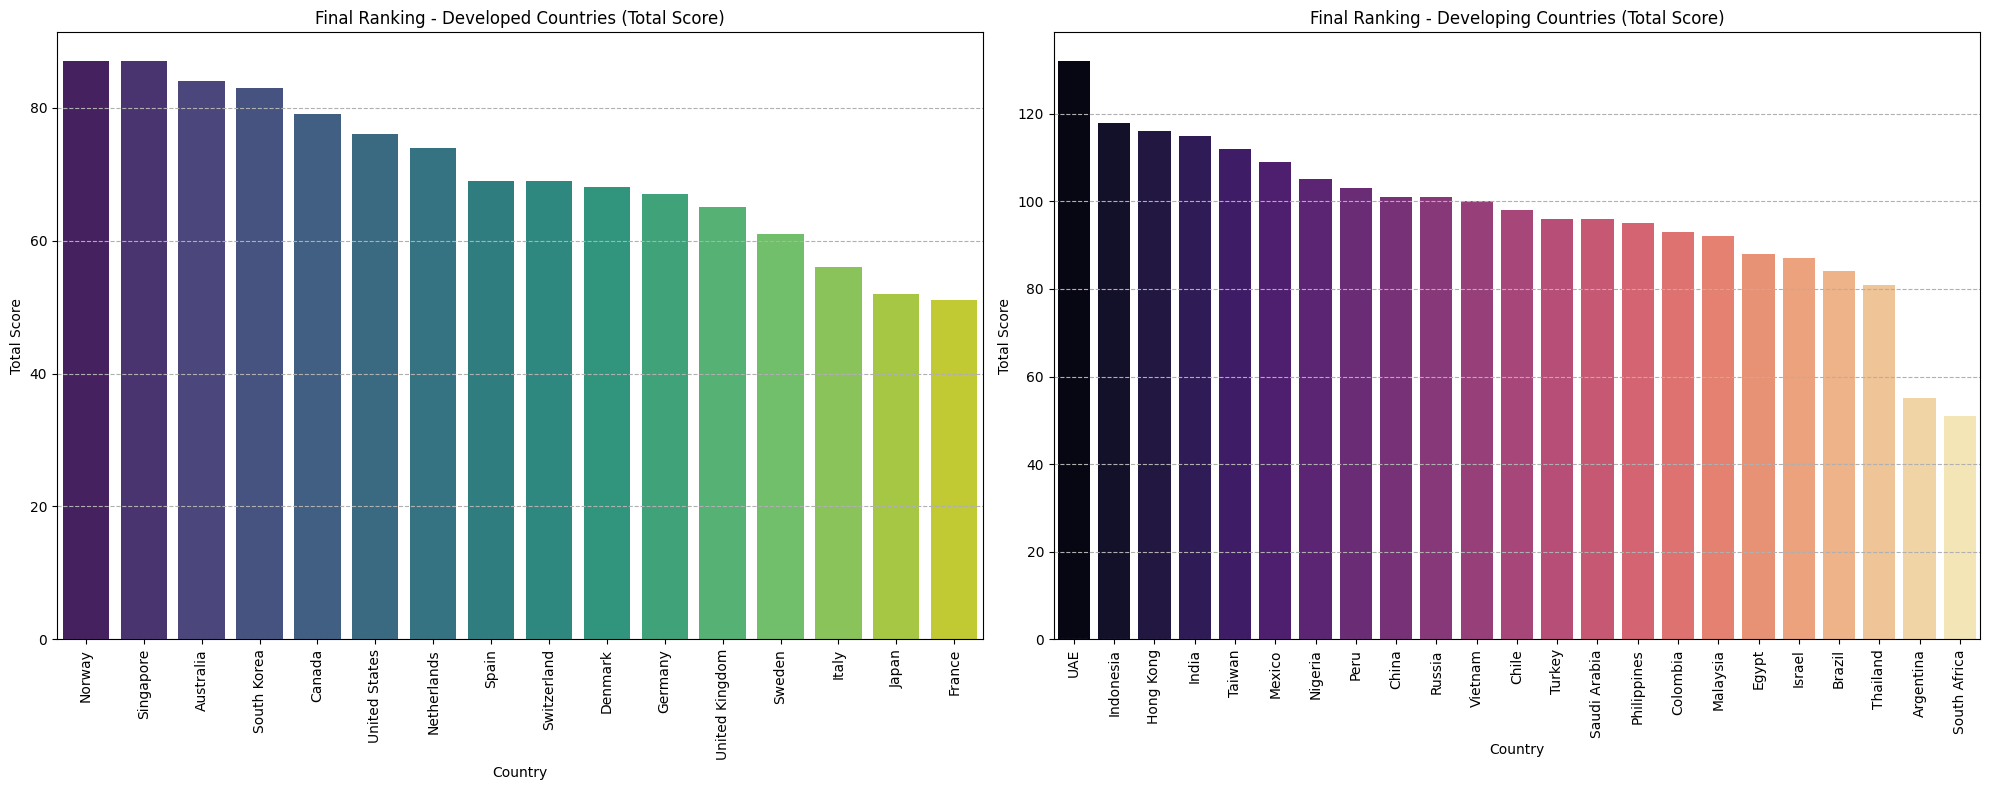

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataframes are available
if 'developed_countries_final_df' in locals() and 'developing_countries_final_df' in locals():

    # Sort by Total_Score for better visualization
    developed_countries_final_df_sorted = developed_countries_final_df.sort_values(by='Total_Score', ascending=False)
    developing_countries_final_df_sorted = developing_countries_final_df.sort_values(by='Total_Score', ascending=False)

    # Create subplots for the two groups
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Bar chart for Developed Countries
    sns.barplot(ax=axes[0], x='Country', y='Total_Score', data=developed_countries_final_df_sorted, palette='viridis')
    axes[0].set_title('Final Ranking - Developed Countries (Total Score)')
    axes[0].set_xlabel('Country')
    axes[0].set_ylabel('Total Score')
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].grid(axis='y', linestyle='--')

    # Bar chart for Developing Countries
    sns.barplot(ax=axes[1], x='Country', y='Total_Score', data=developing_countries_final_df_sorted, palette='magma')
    axes[1].set_title('Final Ranking - Developing Countries (Total Score)')
    axes[1].set_xlabel('Country')
    axes[1].set_ylabel('Total Score')
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()
else:
    print("Error: DataFrames for developed and developing countries not found. Please ensure the previous steps to create them were run.")

In [26]:
# Sort the df_final_ranking DataFrame by 'Stage' in ascending order and then by 'Total_Score' in descending order
df_final_ranking_sorted_final = df_final_ranking.sort_values(by=['Stage', 'Total_Score'], ascending=[True, False])

# Define the score columns including the new Real_Estate_Score
score_columns = [
    'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score',
    'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score',
    'Banking_Health_Score', 'Real_Estate_Score'
]

# Display the final ranking table
print("🏆 Final Ranking of Countries Based on Combined Scores (Including Real Estate Index):")
display(df_final_ranking_sorted_final[['Country', 'Stage'] + score_columns + ['Total_Score', 'Overall_Rank']])

🏆 Final Ranking of Countries Based on Combined Scores (Including Real Estate Index):


,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Banking_Health_Score,Real_Estate_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,3,13,100,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,3,9,93,2.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,3,6,93,2.0
0,United States,Developed,14,8,2,4,16,6,7,16,3,16,92,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,3,12,91,4.0
15,Netherlands,Developed,2,14,7,11,14,11,6,6,3,14,88,5.0
10,South Korea,Developed,16,12,9,10,4,3,15,11,3,3,86,6.0
16,Switzerland,Developed,7,16,1,14,6,16,5,1,3,15,84,7.0
19,Denmark,Developed,10,7,12,16,1,12,2,5,3,11,79,8.0
3,Germany,Developed,1,11,14,9,13,9,4,3,3,8,75,9.0


In [25]:
# Update the 'Total_Score' by adding the 'Real_Estate_Score'
# Handle potential NaN values that might occur if a country didn't have a real estate score
df_final_ranking['Total_Score_Updated'] = df_final_ranking['Total_Score'] + df_final_ranking['Real_Estate_Score'].fillna(0)

# Drop the old 'Total_Score' column and rename the new one
df_final_ranking = df_final_ranking.drop(columns=['Total_Score'])
df_final_ranking = df_final_ranking.rename(columns={'Total_Score_Updated': 'Total_Score'})

# Re-calculate the Overall_Rank based on the updated Total_Score
df_final_ranking['Overall_Rank'] = df_final_ranking.groupby('Stage')['Total_Score'] \
                                     .rank(ascending=False, method='dense')

# Display the relevant columns of the updated df_final_ranking DataFrame to verify
display(df_final_ranking[['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score', 'Banking_Health_Score', 'Real_Estate_Score', 'Total_Score', 'Overall_Rank']].sort_values(by=['Stage', 'Total_Score'], ascending=[True, False]).head())

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Banking_Health_Score,Real_Estate_Score,Total_Score,Overall_Rank
18,Norway,Developed,11,9,13,12,2,15,14,8,3,13,100,1.0
9,Australia,Developed,9,6,6,13,11,8,13,15,3,9,93,2.0
20,Singapore,Developed,13,15,3,3,15,10,16,9,3,6,93,2.0
0,United States,Developed,14,8,2,4,16,6,7,16,3,16,92,3.0
7,Canada,Developed,15,4,5,7,8,14,11,12,3,12,91,4.0


In [24]:
# Select the 'Country' and 'Real_Estate_Score' columns from df_ranked_real_estate
df_real_estate_scores = df_ranked_real_estate[['Country', 'Real_Estate_Score']].copy()

# Merge df_final_ranking with df_real_estate_scores using a left merge on the 'Country' column
# Ensure df_final_ranking is available
if 'df_final_ranking' in locals():
    df_final_ranking = pd.merge(df_final_ranking, df_real_estate_scores, on='Country', how='left')

    # Display the first few rows of the updated df_final_ranking DataFrame to verify
    display(df_final_ranking.head())

    # Print columns to check for the new column name
    print("Columns after merging real estate scores:", df_final_ranking.columns.tolist())
else:
    print("Error: df_final_ranking DataFrame not found. Please ensure the previous steps to create it were run.")

,Country,Stage,GDP_Growth_Score,Misery_Score,Buffett_Score,Government_Debt_Score,FDI_Inflow_Score,Political_Risk_Score_Ranked,Trade_Growth_Score,Bond_Yield_Score,Overall_Rank,Banking_Health_Score,Total_Score,Real_Estate_Score
0,United States,Developed,14,8,2,4,16,6,7,16,5.0,3,76,16
1,China,Developing,20,16,12,5,23,13,9,2,9.0,1,101,18
2,Japan,Developed,5,13,4,1,5,7,12,2,13.0,3,52,1
3,Germany,Developed,1,11,14,9,13,9,4,3,9.0,3,67,8
4,United Kingdom,Developed,6,10,11,8,9,5,1,14,10.0,1,65,4


Columns after merging real estate scores: ['Country', 'Stage', 'GDP_Growth_Score', 'Misery_Score', 'Buffett_Score', 'Government_Debt_Score', 'FDI_Inflow_Score', 'Political_Risk_Score_Ranked', 'Trade_Growth_Score', 'Bond_Yield_Score', 'Overall_Rank', 'Banking_Health_Score', 'Total_Score', 'Real_Estate_Score']


In [23]:
# Convert ranks into scores (Highest score for the highest Real Estate Index per group)
def assign_scores_real_estate(group):
    group = group.sort_values('Real_Estate_Index', ascending=False).reset_index(drop=True)
    total = len(group)
    group['Real_Estate_Score'] = total - group.index  # Highest score for the highest Real Estate Index
    return group

# Apply the scoring function to each group
df_ranked_real_estate = df_ranked_real_estate.groupby('Stage', group_keys=False).apply(assign_scores_real_estate)

# Display the relevant columns to verify the scoring.
display(df_ranked_real_estate[['Country', 'Stage', 'Real_Estate_Index', 'Real_Estate_Rank', 'Real_Estate_Score']].head())

/tmp/ipython-input-629887351.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ranked_real_estate = df_ranked_real_estate.groupby('Stage', group_keys=False).apply(assign_scores_real_estate)


,Country,Stage,Real_Estate_Index,Real_Estate_Rank,Real_Estate_Score
0,United States,Developed,145.6,1.0,16
1,Switzerland,Developed,142.6,2.0,15
2,Netherlands,Developed,134.5,3.0,14
3,Norway,Developed,127.3,4.0,13
4,Canada,Developed,126.7,5.0,12


In [22]:
# Rank countries within their groups ('Developed'/'Developing') based on 'Real_Estate_Index'
# Ensure 'Real_Estate_Index' and 'Stage' columns are present in df
if 'Real_Estate_Index' in df.columns and 'Stage' in df.columns:
    # Create a copy to work with for Real Estate Index analysis
    df_ranked_real_estate = df.copy()

    # Drop rows where Real_Estate_Index is missing, as we cannot rank them
    df_ranked_real_estate.dropna(subset=['Real_Estate_Index'], inplace=True)

    # Within each 'Stage' group, rank 'Real_Estate_Index' in descending order (higher index is better).
    df_ranked_real_estate['Real_Estate_Rank'] = df_ranked_real_estate.groupby('Stage')['Real_Estate_Index'] \
                                                 .rank(ascending=False, method='dense')

    # Display the relevant columns to verify the ranking.
    print("Countries Ranked by Real Estate Index within Stages:")
    display(df_ranked_real_estate[['Country', 'Stage', 'Real_Estate_Index', 'Real_Estate_Rank']].head())
else:
    print("Error: 'Real_Estate_Index' or 'Stage' column not found in the DataFrame.")

Countries Ranked by Real Estate Index within Stages:


,Country,Stage,Real_Estate_Index,Real_Estate_Rank
0,United States,Developed,145.6,1.0
1,China,Developing,98.7,6.0
2,Japan,Developed,89.3,16.0
3,Germany,Developed,112.4,9.0
4,United Kingdom,Developed,97.8,13.0
